<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Split-data" data-toc-modified-id="Split-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split data</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature selection</a></span><ul class="toc-item"><li><span><a href="#condition" data-toc-modified-id="condition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>condition</a></span></li></ul></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Xgboost</a></span><ul class="toc-item"><li><span><a href="#Train,-validation,-Test" data-toc-modified-id="Train,-validation,-Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train, validation, Test</a></span></li><li><span><a href="#model" data-toc-modified-id="model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>model</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LightGBM</a></span><ul class="toc-item"><li><span><a href="#Train,-Validation,-Test" data-toc-modified-id="Train,-Validation,-Test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train, Validation, Test</a></span></li><li><span><a href="#model" data-toc-modified-id="model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>model</a></span></li></ul></li><li><span><a href="#CATboost" data-toc-modified-id="CATboost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CATboost</a></span><ul class="toc-item"><li><span><a href="#Train,-Validation,-Test" data-toc-modified-id="Train,-Validation,-Test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train, Validation, Test</a></span></li><li><span><a href="#model" data-toc-modified-id="model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>model</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Train,-validation,-Test" data-toc-modified-id="Train,-validation,-Test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train, validation, Test</a></span></li><li><span><a href="#model" data-toc-modified-id="model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>model</a></span></li></ul></li><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ensemble</a></span><ul class="toc-item"><li><span><a href="#stacking" data-toc-modified-id="stacking-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>stacking</a></span></li></ul></li><li><span><a href="#submits" data-toc-modified-id="submits-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>submits</a></span><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Test</a></span></li></ul></li><li><span><a href="#미래전략공간" data-toc-modified-id="미래전략공간-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>미래전략공간</a></span></li></ul></div>

In [ ]:
import sys

sys.path.append('../code')

import pandas as pd
import seaborn as sns
import missingno as mn
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import xgboost as xgb
import lightgbm as lgb
import catboost as cgb
from keras import layers as KL
from keras import models as KM
from keras import callbacks as cb
from keras import optimizers as op
import keras.backend as K

from preprocessing import *
from config import *
# from models import *
from utils import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
# # data
# data_regular = pd.read_csv('../dataset/Regular_Season_Batter.csv', index_col=0)
# data_regular.loc[:,'team'] = data_regular.team.apply(lambda x: '넥센' if x == '히어로즈' else x)
# # concatenate 2019 batter
# print('Before concat 2019 batter: ',data_regular.shape)
# data_regular = batter2019(data_regular)
# print('After concate 2019 batter: ',data_regular.shape)

# # # features
# config = Config()
# print('target2: ', config.target2)

# Split data

In [4]:
# # data split
# x_data, y_data = split_data(data_regular, config)

In [7]:
# pd.concat([x_data, y_data], axis=1).to_csv('../dataset/after_preprocessing.csv', index=False)

In [ ]:
data = pd.read_csv('../dataset/after_preprocessing.csv')
x_data = data.drop(['AB','OBP','SLG','OPS'], axis=1)
y_data = data[['AB','OBP','SLG','OPS']]

# Feature selection

In [ ]:
c1 = ['year', 'height', 'weight', 'age', 'cum_season', 'grad_status', 'career_count', 'starting_salary', 'salary']
c2 = list()
c3 = list()
c4 = ['OPS_up','OPS_down','OBP_up','OBP_down','SLG_up','SLG_down','OPS_trend','OBP_trend','SLG_trend']
cat_features = ['team','position1']
bin_features = ['retire', 'team_move']
lag_features =  ['H', 'G', '2B', 'HR', 'SO', 'BB', 'TB', 'MH', 'XBH', 'GW_RBI', 'avg', 'SLG', 'AB', 'PA', 'OBP', 'E' ,'OPS', 'RISP', 'BABIP', 'BABIP_diff', 'corrected_OPS' ,'1B_rate', '2B_rate', 'HR_rate','mean_OPS','mean_OBP','mean_SLG', 'GO/AO', 'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA']
total_features = ['H', 'G', 'HBP', 'GDP', '2B', 'HR', 'SO', 'R', 'RBI', 'AB', 'BB', 'TB',  'SF', 'MH', 'PA','XBH', 'GO', 'AO', 'GW_RBI', 'XR']
for f in lag_features:
    c2.append('lag_1_{}'.format(f))
for f in total_features:
    c3.append('total_{}'.format(f))

## condition

In [ ]:
x_data_raw = x_data.copy()
y_data_raw = y_data.copy()

y_data_raw = y_data_raw[x_data_raw.year > 2001]
x_data_raw = x_data_raw[x_data_raw.year > 2001]

x_data_raw_2017 = x_data_raw[x_data_raw.year < 2018]
y_data_raw_2017 = y_data_raw[x_data_raw.year < 2018]

x_data_raw_2017 = x_data_raw_2017[y_data_raw_2017.AB > 10]
y_data_raw_2017 = y_data_raw_2017[y_data_raw_2017.AB > 10]

x_data_raw[x_data_raw.year==2019] = x_data_raw[x_data_raw.year==2019].fillna(0)

# x_data_raw부터하면 error 발생. 
y_data_raw = pd.concat([y_data_raw_2017, y_data_raw[x_data_raw.year>=2018]], axis=0)
x_data_raw = pd.concat([x_data_raw_2017, x_data_raw[x_data_raw.year>=2018]], axis=0)

In [ ]:
print('x_data_raw[x_data_raw.year<2019].shape: ',x_data_raw[x_data_raw.year<2019].shape)
print('x_data_raw[x_data_raw.year==2019].shape: ',x_data_raw[x_data_raw.year==2019].shape)

In [71]:
pd.concat([x_data[x_data.batter_name=='박병호'][['batter_name','year','avg','1B','2B','3B','HR','BABIP','OPS_trend','OBP_trend','SLG_trend']] , y_data[x_data.batter_name=='박병호'][['AB','SLG','OBP','OPS']]], axis=1)

batter_name  year    avg    1B    2B   3B    HR     BABIP  OPS_trend  \
786          박병호  2005  0.190  17.0  11.0  0.0   3.0  0.241379      0.000   
787          박병호  2006  0.162  14.0   2.0  0.0   5.0  0.192771      0.000   
788          박병호  2009  0.218  25.0   7.0  0.0   9.0  0.290909      0.000   
789          박병호  2010  0.188  19.0   4.0  0.0   7.0  0.230000     -0.096   
790          박병호  2011  0.254  25.0  11.0  2.0  13.0  0.336283     -0.161   
791          박병호  2012  0.290  71.0  34.0  0.0  31.0  0.314371     -0.066   
792          박병호  2013  0.318  89.0  17.0  0.0  37.0  0.328173      0.013   
793          박병호  2014  0.303  69.0  16.0  2.0  52.0  0.323420      0.090   
794          박병호  2015  0.343  92.0  35.0  1.0  53.0  0.402516      0.167   
795          박병호  2018  0.345  75.0  20.0  0.0  43.0  0.386179      0.388   
2532         박병호  2019    NaN   NaN   NaN  NaN   NaN       NaN      0.461   

      OBP_trend  SLG_trend     AB    SLG    OBP    OPS  
786       0.000      0.000  163.0  0.313  0.265  0.578  
787       0.000      0.000  130.0  0.292  0.227  0.519  
788       0.000      0.000  188.0  0.399  0.305  0.704  
789      -0.088     -0.102  160.0  0.344  0.305  0.649  
790      -0.016     -0.164  201.0  0.522  0.343  0.865  
791       0.064     -0.055  469.0  0.561  0.393  0.954  
792       0.146      0.021  450.0  0.602  0.437  1.039  
793       0.225      0.098  459.0  0.686  0.433  1.119  
794       0.155      0.179  528.0  0.714  0.436  1.150  
795       0.370      0.402  400.0  0.718  0.457  1.175  
2532      0.445      0.474    NaN  0.000  0.000  0.000

In [72]:
c = c1+c2+c3+c4+cat_features+bin_features
x_data_raw = x_data_raw[c].copy()
print('x_data_raw.shape: ',x_data_raw.shape)

x_data_raw.shape:  (2302, 75)


In [73]:
x_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 2 to 2673
Data columns (total 75 columns):
year                   2302 non-null int64
height                 2302 non-null float64
weight                 2302 non-null float64
age                    2302 non-null int64
cum_season             2302 non-null float64
grad_status            2302 non-null int64
career_count           2302 non-null int64
starting_salary        1245 non-null float64
salary                 1419 non-null float64
lag_1_H                1928 non-null float64
lag_1_G                1928 non-null float64
lag_1_2B               1928 non-null float64
lag_1_HR               1928 non-null float64
lag_1_SO               1928 non-null float64
lag_1_BB               1928 non-null float64
lag_1_TB               1928 non-null float64
lag_1_MH               1853 non-null float64
lag_1_XBH              1928 non-null float64
lag_1_GW_RBI           1928 non-null float64
lag_1_avg              1926 non-null float64
l

In [74]:
idx = x_data_raw.dropna().index
x_data_raw = x_data_raw.loc[idx]
y_data_raw = y_data_raw.loc[idx]

In [75]:
x_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 3 to 2673
Data columns (total 75 columns):
year                   1012 non-null int64
height                 1012 non-null float64
weight                 1012 non-null float64
age                    1012 non-null int64
cum_season             1012 non-null float64
grad_status            1012 non-null int64
career_count           1012 non-null int64
starting_salary        1012 non-null float64
salary                 1012 non-null float64
lag_1_H                1012 non-null float64
lag_1_G                1012 non-null float64
lag_1_2B               1012 non-null float64
lag_1_HR               1012 non-null float64
lag_1_SO               1012 non-null float64
lag_1_BB               1012 non-null float64
lag_1_TB               1012 non-null float64
lag_1_MH               1012 non-null float64
lag_1_XBH              1012 non-null float64
lag_1_GW_RBI           1012 non-null float64
lag_1_avg              1012 non-null float64
l

In [76]:
print('x_data_raw[x_data_raw.year<2019].shape: ',x_data_raw[x_data_raw.year<2019].shape)
print('x_data_raw[x_data_raw.year==2019].shape: ',x_data_raw[x_data_raw.year==2019].shape)

x_data_raw[x_data_raw.year<2019].shape:  (792, 75)
x_data_raw[x_data_raw.year==2019].shape:  (220, 75)


# Xgboost

## Train, validation, Test

In [77]:
x_data_xgb = x_data_raw.copy()
y_data_xgb = y_data_raw.copy()

In [78]:
x_data_xgb = dummy_feature(x_data_xgb, cat_features)
x_data_xgb = x_data_xgb.drop(cat_features, axis=1)

In [79]:
x_data_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 3 to 2673
Data columns (total 94 columns):
year                   1012 non-null int64
height                 1012 non-null float64
weight                 1012 non-null float64
age                    1012 non-null int64
cum_season             1012 non-null float64
grad_status            1012 non-null int64
career_count           1012 non-null int64
starting_salary        1012 non-null float64
salary                 1012 non-null float64
lag_1_H                1012 non-null float64
lag_1_G                1012 non-null float64
lag_1_2B               1012 non-null float64
lag_1_HR               1012 non-null float64
lag_1_SO               1012 non-null float64
lag_1_BB               1012 non-null float64
lag_1_TB               1012 non-null float64
lag_1_MH               1012 non-null float64
lag_1_XBH              1012 non-null float64
lag_1_GW_RBI           1012 non-null float64
lag_1_avg              1012 non-null float64
l

In [80]:
x_train, y_train, x_val, y_val, x_test, y_test, x_submit, y_submit = split_cv(x_data_xgb, y_data_xgb)

In [81]:
x_data_kfold = pd.concat([x_train, x_val, x_test], axis=0)
y_data_kfold = pd.concat([y_train, y_val, y_test], axis=0)
print('x_data_kfold.shape: ',x_data_kfold.shape)
print('y_data_kfold.shape: ',y_data_kfold.shape)

x_data_kfold.shape:  (792, 93)
y_data_kfold.shape:  (792, 4)


In [82]:
print('x_train.shape: ',x_train.shape)
print('x_val.shape: ',x_val.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (566, 93)
x_val.shape:  (101, 93)
x_test.shape:  (125, 93)


## model

In [83]:
params = {
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "max_depth": 4,
    "min_child_weight": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "colsample_bylevel": 0.8,
    "alpha": 0,
    "lambda": 1,
    "objective": "gpu:reg:linear",
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "eval_metric":"rmse"
}

In [84]:
class XGB_temp:
    def __init__(self, params):
        self.model = xgb.XGBRegressor(**params)

    def run(self, train, val, test, target, verbose=50):
        self.model.fit(train[0], train[1][target],
                          eval_set=[(train[0], train[1][target]), (val[0], val[1][target])],
                          early_stopping_rounds=100,
                          sample_weight=train[1]['AB'],
                          verbose=verbose)
        prob = self.model.predict(test, ntree_limit=self.model.best_iteration)

        return prob

    def predict(self, y_test, y_pred, target):
        e = wrmse(y_test[target], y_pred, y_test['AB'])
        e2 = rmse(y_test[target], y_pred)
        print('test WRMSE: {0:.6f}'.format(e))
        print('test RMSE: {0:.6f}'.format(e2))
        
    def kfold(self, params, data, test, target, k, seed):
        folds = KFold(n_splits=k, random_state=seed, shuffle=True)
        
        probs = np.zeros(test.shape[0])
        val_probs = np.zeros(data[0].shape[0])
        
        for i, (train_idx, valid_idx) in enumerate(folds.split(X=data[0], y=data[1][target])):
            print('-'*30)
            print('{} fold'.format(i))
            x_train, y_train = data[0].iloc[train_idx, :], data[1].iloc[train_idx]
            x_valid, y_valid = data[0].iloc[valid_idx, :], data[1].iloc[valid_idx]

            self.model = xgb.XGBRegressor(**params)
            prob = self.run([x_train, y_train], [x_valid, y_valid], test, target)
            probs += prob/k
            
            val_prob = self.model.predict(x_valid, ntree_limit=self.model.best_iteration)
            val_probs[valid_idx] = val_prob
        
        return probs, val_probs   

In [85]:
# model
xgboost = XGB_temp(params)

print('## OPS')
prob_xgb = xgboost.run([x_train, y_train], [x_val, y_val], x_test, config.target, verbose=50)
xgboost.predict(y_test, prob_xgb, config.target)

## OPS
[0]	validation_0-rmse:0.266397	validation_1-rmse:0.265193
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.07867	validation_1-rmse:0.103332
[100]	validation_0-rmse:0.055891	validation_1-rmse:0.1037
Stopping. Best iteration:
[40]	validation_0-rmse:0.08544	validation_1-rmse:0.101192

test WRMSE: 0.089843
test RMSE: 0.173722


In [86]:
probs_xgb, val_probs_xgb = xgboost.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target, k=5, seed=config.seed)

------------------------------
0 fold
[0]	validation_0-rmse:0.268044	validation_1-rmse:0.267908
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.093483	validation_1-rmse:0.114718
[100]	validation_0-rmse:0.072987	validation_1-rmse:0.115752
[150]	validation_0-rmse:0.057904	validation_1-rmse:0.120003
Stopping. Best iteration:
[61]	validation_0-rmse:0.088959	validation_1-rmse:0.114036

------------------------------
1 fold
[0]	validation_0-rmse:0.2664	validation_1-rmse:0.274774
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.07914	validation_1-rmse:0.165714
[100]	validation_0-rmse:0.055467	validation_1-rmse:0.165533
[150]	validation_0-rmse:0.039801	validation_1-rmse:0.163543
[200]	validation_0-rmse:0.028851	validation_1-r

In [87]:
# model
xgboost_obp = XGB_temp(params)

print('## OBP')
prob_obp_xgb = xgboost_obp.run([x_train, y_train], [x_val, y_val], x_test, config.target2[0], verbose=50)
xgboost_obp.predict(y_test, prob_obp_xgb, config.target2[0])

## OBP
[0]	validation_0-rmse:0.154271	validation_1-rmse:0.154626
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.031045	validation_1-rmse:0.042424
[100]	validation_0-rmse:0.022148	validation_1-rmse:0.042123
[150]	validation_0-rmse:0.015373	validation_1-rmse:0.042739
Stopping. Best iteration:
[64]	validation_0-rmse:0.028693	validation_1-rmse:0.04166

test WRMSE: 0.036321
test RMSE: 0.096019


In [88]:
probs_obp, val_probs_obp = xgboost.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[0], k=5, seed=config.seed)

------------------------------
0 fold
[0]	validation_0-rmse:0.160557	validation_1-rmse:0.15199
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.046281	validation_1-rmse:0.045247
[100]	validation_0-rmse:0.040304	validation_1-rmse:0.045356
[150]	validation_0-rmse:0.037245	validation_1-rmse:0.045735
Stopping. Best iteration:
[81]	validation_0-rmse:0.042462	validation_1-rmse:0.044794

------------------------------
1 fold
[0]	validation_0-rmse:0.154494	validation_1-rmse:0.175479
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.032444	validation_1-rmse:0.086756
[100]	validation_0-rmse:0.022275	validation_1-rmse:0.088572
Stopping. Best iteration:
[44]	validation_0-rmse:0.033967	validation_1-rmse:0.086488

-------------------

In [89]:
# model
xgboost_slg = XGB_temp(params)

print('## SLG')
prob_slg_xgb = xgboost_slg.run([x_train, y_train], [x_val, y_val], x_test, config.target2[1], verbose=50)
xgboost_slg.predict(y_test, prob_slg_xgb, config.target2[1])

## SLG
[0]	validation_0-rmse:0.137299	validation_1-rmse:0.120202
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.053393	validation_1-rmse:0.069291
[100]	validation_0-rmse:0.036261	validation_1-rmse:0.068848
[150]	validation_0-rmse:0.025661	validation_1-rmse:0.067991
[200]	validation_0-rmse:0.017821	validation_1-rmse:0.067143
[250]	validation_0-rmse:0.012792	validation_1-rmse:0.067346
[300]	validation_0-rmse:0.00888	validation_1-rmse:0.067538
Stopping. Best iteration:
[208]	validation_0-rmse:0.016885	validation_1-rmse:0.066868

test WRMSE: 0.064744
test RMSE: 0.100241


In [90]:
probs_slg, val_probs_slg = xgboost.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[1], k=5, seed=config.seed)

------------------------------
0 fold
[0]	validation_0-rmse:0.140475	validation_1-rmse:0.134166
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.058532	validation_1-rmse:0.082661
[100]	validation_0-rmse:0.042699	validation_1-rmse:0.083834
[150]	validation_0-rmse:0.03362	validation_1-rmse:0.084364
Stopping. Best iteration:
[53]	validation_0-rmse:0.056683	validation_1-rmse:0.082608

------------------------------
1 fold
[0]	validation_0-rmse:0.134396	validation_1-rmse:0.156659
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.053597	validation_1-rmse:0.1007
[100]	validation_0-rmse:0.038198	validation_1-rmse:0.100729
[150]	validation_0-rmse:0.027296	validation_1-rmse:0.102311
Stopping. Best iteration:
[94]	validation_0-rms

In [91]:
prob_sum_xgb = prob_obp_xgb + prob_slg_xgb
e = wrmse(y_test[config.target], prob_sum_xgb, y_test['AB'])
e2 = rmse(y_test[config.target], prob_sum_xgb)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.089417
test RMSE: 0.171337


In [92]:
prob_xgb_submit = xgboost.model.predict(x_submit, ntree_limit=xgboost.model.best_iteration)
prob_obp_submit = xgboost_obp.model.predict(x_submit, ntree_limit=xgboost_obp.model.best_iteration)
prob_slg_submit = xgboost_slg.model.predict(x_submit, ntree_limit=xgboost_slg.model.best_iteration)
prob_xgb_sum_submit = prob_obp_submit + prob_slg_submit

print('prob_xgb_submit.shape: ',prob_xgb_submit.shape)
print('prob_xgb_sum_submit.shape: ',prob_xgb_sum_submit.shape)

prob_xgb_submit.shape:  (220,)
prob_xgb_sum_submit.shape:  (220,)


In [93]:
val_probs_xgb_sum = val_probs_obp + val_probs_slg
val_probs_xgb_df = pd.DataFrame({'xgb':val_probs_xgb,'xgb_sum':val_probs_xgb_sum})

probs_xgb_sum = probs_obp + probs_slg

print('val_probs_xgb_df.shape: ',val_probs_xgb_df.shape)
print('probs_xgb_sum.shape: ',probs_xgb_sum.shape)
print('probs_xgb.shape: ',probs_xgb.shape)

val_probs_xgb_df.shape:  (792, 2)
probs_xgb_sum.shape:  (220,)
probs_xgb.shape:  (220,)


## Feature importance

In [94]:
# f_score_gain = xgboost_obp.model.get_booster().get_score(importance_type='gain')
# f_score_weight = xgboost_obp.model.get_booster().get_score(importance_type='weight')
# f_score_cover = xgboost_obp.model.get_booster().get_score(importance_type='cover')
# gain_df = pd.DataFrame({'features':list(f_score_gain.keys()), 'importance':list(f_score_gain.values())})
# weight_df = pd.DataFrame({'features':list(f_score_weight.keys()), 'importance':list(f_score_weight.values())})
# cover_df = pd.DataFrame({'features':list(f_score_cover.keys()), 'importance':list(f_score_cover.values())})
# gain_df = gain_df.sort_values(by='importance', ascending=False)
# weight_df = weight_df.sort_values(by='importance', ascending=False)
# cover_df = cover_df.sort_values(by='importance', ascending=False)

# f, ax = plt.subplots(1,3, figsize=(15,20))
# sns.barplot(x='importance', y='features', data=gain_df, ax=ax[0])
# sns.barplot(x='importance', y='features', data=weight_df, ax=ax[1])
# sns.barplot(x='importance', y='features', data=cover_df, ax=ax[2])

In [95]:
# f_score_gain = xgboost_slg.model.get_booster().get_score(importance_type='gain')
# f_score_weight = xgboost_slg.model.get_booster().get_score(importance_type='weight')
# f_score_cover = xgboost_slg.model.get_booster().get_score(importance_type='cover')
# gain_df = pd.DataFrame({'features':list(f_score_gain.keys()), 'importance':list(f_score_gain.values())})
# weight_df = pd.DataFrame({'features':list(f_score_weight.keys()), 'importance':list(f_score_weight.values())})
# cover_df = pd.DataFrame({'features':list(f_score_cover.keys()), 'importance':list(f_score_cover.values())})
# gain_df = gain_df.sort_values(by='importance', ascending=False)
# weight_df = weight_df.sort_values(by='importance', ascending=False)
# cover_df = cover_df.sort_values(by='importance', ascending=False)

# f, ax = plt.subplots(1,3, figsize=(15,20))
# sns.barplot(x='importance', y='features', data=gain_df, ax=ax[0])
# sns.barplot(x='importance', y='features', data=weight_df, ax=ax[1])
# sns.barplot(x='importance', y='features', data=cover_df, ax=ax[2])

In [96]:
# f, ax = plt.subplots(1,2,figsize=(15,5))

# sns.distplot(y_test.OBP, label='True', ax=ax[0])
# sns.distplot(prob_obp, label='Pred', ax=ax[0])
# ax[0].set_title('obp')
# ax[0].legend()

# sns.distplot(y_test.SLG, label='True', ax=ax[1])
# sns.distplot(prob_slg, label='Pred', ax=ax[1])
# ax[1].set_title('slg')
# ax[1].legend()

In [97]:
# print('true mean: ',y_test.SLG.mean())
# print('true std: ',y_test.SLG.std())
# print('pred mean: ',prob_slg.mean())
# print('pred std: ',prob_slg.std())

In [98]:
# print('true mean: ',y_test.OBP.mean())
# print('true std: ',y_test.OBP.std())
# print('pred mean: ',prob_obp.mean())
# print('pred std: ',prob_obp.std())

# LightGBM

## Train, Validation, Test

In [99]:
x_data_lgb = x_data_raw.copy()
y_data_lgb = y_data_raw.copy()

In [100]:
x_data_lgb[cat_features] = x_data_lgb[cat_features].astype('category')

In [101]:
x_data_lgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 3 to 2673
Data columns (total 75 columns):
year                   1012 non-null int64
height                 1012 non-null float64
weight                 1012 non-null float64
age                    1012 non-null int64
cum_season             1012 non-null float64
grad_status            1012 non-null int64
career_count           1012 non-null int64
starting_salary        1012 non-null float64
salary                 1012 non-null float64
lag_1_H                1012 non-null float64
lag_1_G                1012 non-null float64
lag_1_2B               1012 non-null float64
lag_1_HR               1012 non-null float64
lag_1_SO               1012 non-null float64
lag_1_BB               1012 non-null float64
lag_1_TB               1012 non-null float64
lag_1_MH               1012 non-null float64
lag_1_XBH              1012 non-null float64
lag_1_GW_RBI           1012 non-null float64
lag_1_avg              1012 non-null float64
l

In [102]:
x_train, y_train, x_val, y_val, x_test, y_test, x_submit, y_submit = split_cv(x_data_lgb, y_data_lgb)

In [103]:
x_data_kfold = pd.concat([x_train, x_val, x_test], axis=0)
y_data_kfold = pd.concat([y_train, y_val, y_test], axis=0)
print('x_data_kfold.shape: ',x_data_kfold.shape)
print('y_data_kfold.shape: ',y_data_kfold.shape)

x_data_kfold.shape:  (792, 74)
y_data_kfold.shape:  (792, 4)


In [104]:
print('x_train.shape: ',x_train.shape)
print('x_val.shape: ',x_val.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (566, 74)
x_val.shape:  (101, 74)
x_test.shape:  (125, 74)


## model

In [105]:
params = {
    'learning_rate': 0.03,
    'n_estimators': 10000,
    'max_depth': 3,
    'num_leaves': 8,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'min_split_gain': np.power(10.0, -10),
    'reg_alpha': 0,
    'reg_lambda': 0,
    'min_child_weight': 10,
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'objective': 'regression',
}

In [106]:
class LGB_temp:
    def __init__(self, params):
        self.model = lgb.LGBMRegressor(**params)

    def run(self, train, val, test, target, cat_features='auto', verbose=200):
        self.model.fit(train[0], train[1][target],
                          eval_set=[(train[0], train[1][target]), (val[0], val[1][target])],
                          early_stopping_rounds=100,
                          sample_weight=train[1]['AB'],
                          categorical_feature=cat_features,
                          verbose=verbose)
        prob = self.model.predict(test, ntree_limit=self.model.best_iteration_)
        return prob

    def predict(self, y_test, y_pred, target):
        e = wrmse(y_test[target], y_pred, y_test['AB'])
        e2 = rmse(y_test[target], y_pred)
        print('test WRMSE: {0:.6f}'.format(e))
        print('test RMSE: {0:.6f}'.format(e2))
        
    def kfold(self, params, data, test, target, k, seed):
        folds = KFold(n_splits=k, random_state=seed, shuffle=True)
        
        probs = np.zeros(test.shape[0])
        val_probs = np.zeros(data[0].shape[0])
        
        for i, (train_idx, valid_idx) in enumerate(folds.split(X=data[0], y=data[1][target])):
            print('-'*30)
            print('{} fold'.format(i))
            x_train, y_train = data[0].iloc[train_idx, :], data[1].iloc[train_idx]
            x_valid, y_valid = data[0].iloc[valid_idx, :], data[1].iloc[valid_idx]

            self.model = lgb.LGBMRegressor(**params)
            prob = self.run([x_train, y_train], [x_valid, y_valid], test, target)
            probs += prob/k
            
            val_prob = self.model.predict(x_valid, ntree_limit=self.model.best_iteration_)
            val_probs[valid_idx] = val_prob
        
        return probs, val_probs    

In [107]:
# model
lgbm = LGB_temp(params)

print('## OPS')
prob_lgb = lgbm.run([x_train, y_train], [x_val, y_val], x_test, config.target, cat_features=cat_features)
lgbm.predict(y_test, prob_lgb, config.target)

## OPS
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0625692	valid_1's rmse: 0.102304
[400]	training's rmse: 0.0513587	valid_1's rmse: 0.0981038
[600]	training's rmse: 0.043952	valid_1's rmse: 0.0957285
[800]	training's rmse: 0.0386336	valid_1's rmse: 0.0942939
[1000]	training's rmse: 0.0343962	valid_1's rmse: 0.0936023
[1200]	training's rmse: 0.0306972	valid_1's rmse: 0.0933826
Early stopping, best iteration is:
[1112]	training's rmse: 0.0321439	valid_1's rmse: 0.0933455
test WRMSE: 0.087298
test RMSE: 0.170371


In [108]:
probs_lgb, val_probs_lgb = lgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target, k=5, seed=config.seed)

------------------------------
0 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0635516	valid_1's rmse: 0.115565
[400]	training's rmse: 0.0509355	valid_1's rmse: 0.113999
[600]	training's rmse: 0.0432288	valid_1's rmse: 0.112842
[800]	training's rmse: 0.0377958	valid_1's rmse: 0.112288
Early stopping, best iteration is:
[790]	training's rmse: 0.0380335	valid_1's rmse: 0.112191
------------------------------
1 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.061331	valid_1's rmse: 0.162999
[400]	training's rmse: 0.0498615	valid_1's rmse: 0.161828
[600]	training's rmse: 0.0422956	valid_1's rmse: 0.161679
Early stopping, best iteration is:
[528]	training's rmse: 0.044674	valid_1's rmse: 0.161411
------------------------------
2 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0629519	valid_1's rmse: 0.116278
[400]	training's rmse: 0.0511245	valid_1's rmse: 

In [109]:
# model
lgbm_obp = LGB_temp(params)

print('## OBP')
prob_obp_lgb = lgbm_obp.run([x_train, y_train], [x_val, y_val], x_test, config.target2[0])
lgbm_obp.predict(y_test, prob_obp_lgb, config.target2[0])

## OBP
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0238128	valid_1's rmse: 0.0420755
Early stopping, best iteration is:
[167]	training's rmse: 0.0247332	valid_1's rmse: 0.0419795
test WRMSE: 0.034597
test RMSE: 0.095143


In [110]:
probs_obp, val_probs_obp = lgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[0], k=5, seed=config.seed)

------------------------------
0 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0241885	valid_1's rmse: 0.0448877
[400]	training's rmse: 0.0199884	valid_1's rmse: 0.0440977
[600]	training's rmse: 0.0171385	valid_1's rmse: 0.043815
Early stopping, best iteration is:
[674]	training's rmse: 0.0162521	valid_1's rmse: 0.0437342
------------------------------
1 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0229842	valid_1's rmse: 0.0861331
Early stopping, best iteration is:
[295]	training's rmse: 0.0210112	valid_1's rmse: 0.0857767
------------------------------
2 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0235471	valid_1's rmse: 0.0473211
[400]	training's rmse: 0.0190166	valid_1's rmse: 0.0469916
[600]	training's rmse: 0.016177	valid_1's rmse: 0.0468671
Early stopping, best iteration is:
[622]	training's rmse: 0.0159219	valid_1's rmse: 0.0468283
----

In [111]:
# model
lgbm_slg = LGB_temp(params)

print('## SLG')
prob_slg_lgb = lgbm_slg.run([x_train, y_train], [x_val, y_val], x_test, config.target2[1])
lgbm_slg.predict(y_test, prob_slg_lgb, config.target2[1])

## SLG
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0442352	valid_1's rmse: 0.0700572
[400]	training's rmse: 0.0351945	valid_1's rmse: 0.0677557
[600]	training's rmse: 0.029825	valid_1's rmse: 0.0662268
[800]	training's rmse: 0.0261023	valid_1's rmse: 0.0657512
Early stopping, best iteration is:
[714]	training's rmse: 0.0274527	valid_1's rmse: 0.0657151
test WRMSE: 0.063592
test RMSE: 0.103997


In [112]:
probs_slg, val_probs_slg = lgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[1], k=5, seed=config.seed)

------------------------------
0 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0438677	valid_1's rmse: 0.0813414
[400]	training's rmse: 0.0347603	valid_1's rmse: 0.0805146
[600]	training's rmse: 0.0291484	valid_1's rmse: 0.0795253
[800]	training's rmse: 0.0252534	valid_1's rmse: 0.0795536
Early stopping, best iteration is:
[735]	training's rmse: 0.0263211	valid_1's rmse: 0.0794076
------------------------------
1 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0436005	valid_1's rmse: 0.102066
Early stopping, best iteration is:
[270]	training's rmse: 0.0402531	valid_1's rmse: 0.101857
------------------------------
2 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0439949	valid_1's rmse: 0.0792209
[400]	training's rmse: 0.0354987	valid_1's rmse: 0.0772284
[600]	training's rmse: 0.0298531	valid_1's rmse: 0.0763543
[800]	training's rmse: 0.0259239	valid_

In [113]:
prob_sum_lgb = prob_obp_lgb + prob_slg_lgb
e = wrmse(y_test[config.target], prob_sum_lgb, y_test['AB'])
e2 = rmse(y_test[config.target], prob_sum_lgb)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.087850
test RMSE: 0.173392


In [114]:
prob_lgb_submit = lgbm.model.predict(x_submit, ntree_limit=lgbm.model.best_iteration_)
prob_obp_submit = lgbm_obp.model.predict(x_submit, ntree_limit=lgbm_obp.model.best_iteration_)
prob_slg_submit = lgbm_slg.model.predict(x_submit, ntree_limit=lgbm_slg.model.best_iteration_)
prob_lgb_sum_submit = prob_obp_submit + prob_slg_submit

print('prob_lgb_submit.shape: ',prob_lgb_submit.shape)
print('prob_lgb_sum_submit.shape: ',prob_lgb_sum_submit.shape)

prob_lgb_submit.shape:  (220,)
prob_lgb_sum_submit.shape:  (220,)


In [115]:
val_probs_lgb_sum = val_probs_obp + val_probs_slg
val_probs_lgb_df = pd.DataFrame({'lgb':val_probs_lgb,'lgb_sum':val_probs_lgb_sum})

probs_lgb_sum = probs_obp + probs_slg

print('val_probs_lgb_df.shape: ',val_probs_lgb_df.shape)
print('probs_lgb_sum.shape: ',probs_lgb_sum.shape)
print('probs_lgb.shape: ',probs_lgb.shape)

val_probs_lgb_df.shape:  (792, 2)
probs_lgb_sum.shape:  (220,)
probs_lgb.shape:  (220,)


In [116]:
# f, ax = plt.subplots(1,2,figsize=(15,5))

# sns.distplot(y_test.OBP, label='True', ax=ax[0])
# sns.distplot(prob_obp, label='Pred', ax=ax[0])
# ax[0].set_title('obp')
# ax[0].legend()

# sns.distplot(y_test.SLG, label='True', ax=ax[1])
# sns.distplot(prob_slg, label='Pred', ax=ax[1])
# ax[1].set_title('slg')
# ax[1].legend()

# CATboost

## Train, Validation, Test

In [117]:
x_data_cgb = x_data_raw.copy()
y_data_cgb = y_data_raw.copy()

In [118]:
x_data_cgb[cat_features] = x_data_cgb[cat_features].astype('str')

In [119]:
x_data_cgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 3 to 2673
Data columns (total 75 columns):
year                   1012 non-null int64
height                 1012 non-null float64
weight                 1012 non-null float64
age                    1012 non-null int64
cum_season             1012 non-null float64
grad_status            1012 non-null int64
career_count           1012 non-null int64
starting_salary        1012 non-null float64
salary                 1012 non-null float64
lag_1_H                1012 non-null float64
lag_1_G                1012 non-null float64
lag_1_2B               1012 non-null float64
lag_1_HR               1012 non-null float64
lag_1_SO               1012 non-null float64
lag_1_BB               1012 non-null float64
lag_1_TB               1012 non-null float64
lag_1_MH               1012 non-null float64
lag_1_XBH              1012 non-null float64
lag_1_GW_RBI           1012 non-null float64
lag_1_avg              1012 non-null float64
l

In [120]:
x_train, y_train, x_val, y_val, x_test, y_test, x_submit, y_submit = split_cv(x_data_cgb, y_data_cgb)

In [121]:
x_data_kfold = pd.concat([x_train, x_val, x_test], axis=0)
y_data_kfold = pd.concat([y_train, y_val, y_test], axis=0)
print('x_data_kfold.shape: ',x_data_kfold.shape)
print('y_data_kfold.shape: ',y_data_kfold.shape)

x_data_kfold.shape:  (792, 74)
y_data_kfold.shape:  (792, 4)


In [122]:
print('x_train.shape: ',x_train.shape)
print('x_val.shape: ',x_val.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (566, 74)
x_val.shape:  (101, 74)
x_test.shape:  (125, 74)


## model

In [123]:
params = {
    'iterations':10000,
    'learning_rate':0.03,
    'depth':10,
    'eval_metric':'RMSE',
    'loss_function':'RMSE',
    'bagging_temperature' : 0.1,
    'random_state':223,
    'od_type':'Iter',
    'od_wait':50,
    'task_type':'GPU'
}

In [124]:
class CGB_temp:
    def __init__(self, params):
        self.model = cgb.CatBoostRegressor(**params)

    def run(self, train, val, test, target, cat_features='auto', verbose=False):
        self.model.fit(train[0], train[1][target],
                          eval_set=[(val[0], val[1][target])],
                          early_stopping_rounds=100,
                          sample_weight=train[1]['AB'],
                          cat_features=cat_features,
                          verbose_eval=verbose)
        prob = self.model.predict(test)
        return prob

    def predict(self, y_test, y_pred, target):
        e = wrmse(y_test[target], y_pred, y_test['AB'])
        e2 = rmse(y_test[target], y_pred)
        print('test WRMSE: {0:.6f}'.format(e))
        print('test RMSE: {0:.6f}'.format(e2))
        
    def kfold(self, params, data, test, target, cat_features, k, seed):
        folds = KFold(n_splits=k, random_state=seed, shuffle=True)

        probs = np.zeros(test.shape[0])
        val_probs = np.zeros(data[0].shape[0])

        for i, (train_idx, valid_idx) in enumerate(folds.split(X=data[0], y=data[1][target])):
            print('-'*30)
            print('{} fold'.format(i))
            x_train, y_train = data[0].iloc[train_idx, :], data[1].iloc[train_idx]
            x_valid, y_valid = data[0].iloc[valid_idx, :], data[1].iloc[valid_idx]

            self.model = cgb.CatBoostRegressor(**params)
            prob = self.run([x_train, y_train], [x_valid, y_valid], test, target, cat_features)
            probs += prob/k

            val_prob = self.model.predict(x_valid)
            val_probs[valid_idx] = val_prob

        return probs, val_probs   

In [125]:
# model
cgbm = CGB_temp(params)

print('## OPS')
prob_cgb = cgbm.run([x_train, y_train], [x_val, y_val], x_test, config.target, cat_features=[70,71])
cgbm.predict(y_test, prob_cgb, config.target)

## OPS
test WRMSE: 0.090428
test RMSE: 0.173453


In [126]:
probs_cgb, val_probs_cgb = cgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target, cat_features=[70,71], k=5, seed=config.seed)

------------------------------
0 fold
------------------------------
1 fold
------------------------------
2 fold
------------------------------
3 fold
------------------------------
4 fold


In [127]:
# model
cgbm_obp = CGB_temp(params)

print('## OBP')
prob_obp_cgb = cgbm_obp.run([x_train, y_train], [x_val, y_val], x_test, config.target2[0], cat_features=[70,71])
cgbm_obp.predict(y_test, prob_obp_cgb, config.target2[0])

## OBP
test WRMSE: 0.034889
test RMSE: 0.093982


In [128]:
probs_obp, val_probs_obp = cgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[0], cat_features=[70,71], k=5, seed=config.seed)

------------------------------
0 fold
------------------------------
1 fold
------------------------------
2 fold
------------------------------
3 fold
------------------------------
4 fold


In [129]:
# model
cgbm_slg = CGB_temp(params)

print('## SLG')
prob_slg_cgb = cgbm_slg.run([x_train, y_train], [x_val, y_val], x_test, config.target2[1], cat_features=[70,71])
cgbm_slg.predict(y_test, prob_slg_cgb, config.target2[1])

## SLG
test WRMSE: 0.063837
test RMSE: 0.101813


In [130]:
probs_slg, val_probs_slg = cgbm.kfold(params, [x_data_kfold, y_data_kfold], x_submit, config.target2[1], cat_features=[70,71], k=5, seed=config.seed)

------------------------------
0 fold
------------------------------
1 fold
------------------------------
2 fold
------------------------------
3 fold
------------------------------
4 fold


In [131]:
prob_sum_cgb = prob_obp_cgb + prob_slg_cgb
e = wrmse(y_test[config.target], prob_sum_cgb, y_test['AB'])
e2 = rmse(y_test[config.target], prob_sum_cgb)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.091478
test RMSE: 0.168780


In [132]:
prob_cgb_submit = cgbm.model.predict(x_submit)
prob_obp_submit = cgbm_obp.model.predict(x_submit)
prob_slg_submit = cgbm_slg.model.predict(x_submit)
prob_cgb_sum_submit = prob_obp_submit + prob_slg_submit

print('prob_cgb_submit.shape: ',prob_cgb_submit.shape)
print('prob_cgb_sum_submit.shape: ',prob_cgb_sum_submit.shape)

prob_cgb_submit.shape:  (220,)
prob_cgb_sum_submit.shape:  (220,)


In [133]:
val_probs_cgb_sum = val_probs_obp + val_probs_slg
val_probs_cgb_df = pd.DataFrame({'cgb':val_probs_cgb,'cgb_sum':val_probs_cgb_sum})

probs_cgb_sum = probs_obp + probs_slg

print('val_probs_cgb_df.shape: ',val_probs_cgb_df.shape)
print('probs_cgb_sum.shape: ',probs_cgb_sum.shape)
print('probs_cgb.shape: ',probs_cgb.shape)

val_probs_cgb_df.shape:  (792, 2)
probs_cgb_sum.shape:  (220,)
probs_cgb.shape:  (220,)


In [134]:
# f, ax = plt.subplots(1,2,figsize=(15,5))

# sns.distplot(y_test.OBP, label='True', ax=ax[0])
# sns.distplot(prob_obp, label='Pred', ax=ax[0])
# ax[0].set_title('obp')
# ax[0].legend()

# sns.distplot(y_test.SLG, label='True', ax=ax[1])
# sns.distplot(prob_slg, label='Pred', ax=ax[1])
# ax[1].set_title('slg')
# ax[1].legend()

# Neural Network

## Train, validation, Test

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
x_data_nn = x_data_raw.copy()
y_data_nn = y_data_raw.copy()

In [137]:
x_data_nn = dummy_feature(x_data_nn, cat_features)
x_data_nn = x_data_nn.drop(cat_features, axis=1)

In [138]:
x_data_nn = x_data_nn.fillna(-1)
# x_data_nn = x_data_nn.loc[index]
# y_data_nn = y_data_nn.loc[index]

In [139]:
scaler = MinMaxScaler()
x_data_nn[c1[1:]+c2+c3+c4] = scaler.fit_transform(x_data_nn[c1[1:]+c2+c3+c4])

In [140]:
x_data_nn.index = np.arange(x_data_nn.shape[0])
y_data_nn.index = np.arange(y_data_nn.shape[0])

In [141]:
x_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1011
Data columns (total 94 columns):
year                   1012 non-null int64
height                 1012 non-null float64
weight                 1012 non-null float64
age                    1012 non-null float64
cum_season             1012 non-null float64
grad_status            1012 non-null float64
career_count           1012 non-null float64
starting_salary        1012 non-null float64
salary                 1012 non-null float64
lag_1_H                1012 non-null float64
lag_1_G                1012 non-null float64
lag_1_2B               1012 non-null float64
lag_1_HR               1012 non-null float64
lag_1_SO               1012 non-null float64
lag_1_BB               1012 non-null float64
lag_1_TB               1012 non-null float64
lag_1_MH               1012 non-null float64
lag_1_XBH              1012 non-null float64
lag_1_GW_RBI           1012 non-null float64
lag_1_avg              1012 non-null flo

In [142]:
x_train, y_train, x_val, y_val, x_test, y_test, x_submit, y_submit = split_cv(x_data_nn, y_data_nn)

In [143]:
x_data_kfold = pd.concat([x_train, x_val, x_test], axis=0)
y_data_kfold = pd.concat([y_train, y_val, y_test], axis=0)
print('x_data_kfold.shape: ',x_data_kfold.shape)
print('y_data_kfold.shape: ',y_data_kfold.shape)

x_data_kfold.shape:  (792, 93)
y_data_kfold.shape:  (792, 4)


In [144]:
print('x_train.shape: ',x_train.shape)
print('x_val.shape: ',x_val.shape)
print('x_test.shape: ',x_test.shape)

x_train.shape:  (566, 93)
x_val.shape:  (101, 93)
x_test.shape:  (125, 93)


## model

In [145]:
class NN_temp:
    def __init__(self):
        self.model = None
        
    def build(self, input_shape):
        inp = KL.Input(input_shape)
        x = KL.Dense(32, activation='relu')(inp)
        x = KL.Dense(16, activation='relu')(x)
        x = KL.Dense(1024, activation='relu')(x)
        x = KL.Dense(2084, activation='relu')(x)        
        x = KL.Dense(4096, activation='relu')(x)
        out = KL.Dense(1, activation='linear')(x)
        self.model = KM.Model(inp, out)
        
    def run(self, train, val, test, target, epochs, batch_size, early_stopping):
        self.model.compile(optimizer=op.SGD(lr=0.001, momentum=0.9,nesterov=True), loss=self.rmse)
        es = cb.EarlyStopping(monitor='val_loss',mode='min', patience=early_stopping, restore_best_weights=True)
        self.model.fit(x=train[0], 
                       y=train[1][target],
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=[val[0], val[1][target]],
                       callbacks=[es],
                       shuffle=True,
                       verbose=True)
        prob = self.model.predict(test)
        return prob
    
    def kfold(self, data, test, target, epochs, batch_size, early_stopping, k, seed):
        folds = KFold(n_splits=k, random_state=seed, shuffle=True)

        probs = np.zeros(test.shape[0])
        val_probs = np.zeros(data[0].shape[0])

        for i, (train_idx, valid_idx) in enumerate(folds.split(X=data[0], y=data[1][target])):
            print('-'*30)
            print('{} fold'.format(i))
            x_train, y_train = data[0].iloc[train_idx, :], data[1].iloc[train_idx]
            x_valid, y_valid = data[0].iloc[valid_idx, :], data[1].iloc[valid_idx]

            input_shape = (x_train.shape[1],)
            print('input_shape: ',input_shape)
            print('x_valid.shape: ',x_valid.shape)
            self.build(input_shape)
            prob = self.run([x_train, y_train], [x_valid, y_valid], test, target, epochs, batch_size, early_stopping)
            probs += prob[:,0]/k

            val_prob = self.model.predict(x_valid)
            val_probs[valid_idx] = val_prob[:,0]

        return probs, val_probs 
    
    def predict(self, y_test, y_pred, target):
        e = wrmse(y_test[target], y_pred, y_test['AB'])
        e2 = rmse(y_test[target], y_pred)
        print('test WRMSE: {0:.6f}'.format(e))
        print('test RMSE: {0:.6f}'.format(e2))
    
    def rmse(self, y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [146]:
# model
input_shape = (x_train.shape[1],)
nn = NN_temp()
nn.build(input_shape)

print('## OPS')
prob_nn = nn.run([x_train, y_train], [x_val, y_val], x_test, config.target, 500, 64, 30)
nn.predict(y_test, prob_nn, config.target)

## OPS
Train on 566 samples, validate on 101 samples
Epoch 1/500
566/566 [==============================] - 3s 5ms/step - loss: 0.7194 - val_loss: 0.6706
Epoch 2/500
566/566 [==============================] - 0s 97us/step - loss: 0.5867 - val_loss: 0.5021
Epoch 3/500
566/566 [==============================] - 0s 99us/step - loss: 0.4079 - val_loss: 0.3032
Epoch 4/500
566/566 [==============================] - 0s 93us/step - loss: 0.2178 - val_loss: 0.1327
Epoch 5/500
566/566 [==============================] - 0s 90us/step - loss: 0.1265 - val_loss: 0.1261
Epoch 6/500
566/566 [==============================] - 0s 92us/step - loss: 0.1344 - val_loss: 0.1206
Epoch 7/500
566/566 [==============================] - 0s 88us/step - loss: 0.1212 - val_loss: 0.1120
Epoch 8/500
566/566 [==============================] - 0s 92us/step - loss: 0.1172 - val_loss: 0.1104
Epoch 9/500
566/566 [==============================] - 0s 95us/step - loss: 0.1148 - val_loss: 0.1088
Epoch 10/500
566/566 [========

In [147]:
probs_nn, val_probs_nn = nn.kfold([x_data_kfold, y_data_kfold], 
                                  x_submit, 
                                  config.target, 
                                  epochs=500, 
                                  batch_size=64, 
                                  early_stopping=30, 
                                  k=5, 
                                  seed=config.seed)

------------------------------
0 fold
input_shape:  (93,)
x_valid.shape:  (159, 93)
Train on 633 samples, validate on 159 samples
Epoch 1/500
633/633 [==============================] - 1s 910us/step - loss: 0.7024 - val_loss: 0.6270
Epoch 2/500
633/633 [==============================] - 0s 91us/step - loss: 0.5273 - val_loss: 0.4081
Epoch 3/500
633/633 [==============================] - 0s 93us/step - loss: 0.2957 - val_loss: 0.1698
Epoch 4/500
633/633 [==============================] - 0s 95us/step - loss: 0.1275 - val_loss: 0.1221
Epoch 5/500
633/633 [==============================] - 0s 95us/step - loss: 0.1261 - val_loss: 0.1129
Epoch 6/500
633/633 [==============================] - 0s 91us/step - loss: 0.1133 - val_loss: 0.1124
Epoch 7/500
633/633 [==============================] - 0s 95us/step - loss: 0.1136 - val_loss: 0.1107
Epoch 8/500
633/633 [==============================] - 0s 88us/step - loss: 0.1123 - val_loss: 0.1091
Epoch 9/500
633/633 [==============================] 

In [148]:
# model
input_shape = (x_train.shape[1],)
nn_obp = NN_temp()
nn_obp.build(input_shape)

print('## OPS')
prob_nn_obp = nn_obp.run([x_train, y_train], [x_val, y_val], x_test, config.target2[0], 500, 64, 50)
nn_obp.predict(y_test, prob_nn_obp, config.target2[0])

## OPS
Train on 566 samples, validate on 101 samples
Epoch 1/500
566/566 [==============================] - 1s 1ms/step - loss: 0.2950 - val_loss: 0.2159
Epoch 2/500
566/566 [==============================] - 0s 93us/step - loss: 0.1448 - val_loss: 0.0457
Epoch 3/500
566/566 [==============================] - 0s 93us/step - loss: 0.0589 - val_loss: 0.0667
Epoch 4/500
566/566 [==============================] - 0s 95us/step - loss: 0.0525 - val_loss: 0.0400
Epoch 5/500
566/566 [==============================] - 0s 97us/step - loss: 0.0453 - val_loss: 0.0387
Epoch 6/500
566/566 [==============================] - 0s 97us/step - loss: 0.0423 - val_loss: 0.0408
Epoch 7/500
566/566 [==============================] - 0s 92us/step - loss: 0.0409 - val_loss: 0.0387
Epoch 8/500
566/566 [==============================] - 0s 90us/step - loss: 0.0396 - val_loss: 0.0385
Epoch 9/500
566/566 [==============================] - 0s 93us/step - loss: 0.0389 - val_loss: 0.0389
Epoch 10/500
566/566 [========

In [149]:
probs_obp, val_probs_obp = nn_obp.kfold([x_data_kfold, y_data_kfold], 
                                          x_submit, 
                                          config.target2[0], 
                                          epochs=500, 
                                          batch_size=64, 
                                          early_stopping=30, 
                                          k=5, 
                                          seed=config.seed)

------------------------------
0 fold
input_shape:  (93,)
x_valid.shape:  (159, 93)
Train on 633 samples, validate on 159 samples
Epoch 1/500
633/633 [==============================] - 1s 1ms/step - loss: 0.3044 - val_loss: 0.2431
Epoch 2/500
633/633 [==============================] - 0s 91us/step - loss: 0.1704 - val_loss: 0.0824
Epoch 3/500
633/633 [==============================] - 0s 98us/step - loss: 0.0550 - val_loss: 0.0523
Epoch 4/500
633/633 [==============================] - 0s 96us/step - loss: 0.0524 - val_loss: 0.0395
Epoch 5/500
633/633 [==============================] - 0s 90us/step - loss: 0.0432 - val_loss: 0.0428
Epoch 6/500
633/633 [==============================] - 0s 96us/step - loss: 0.0428 - val_loss: 0.0391
Epoch 7/500
633/633 [==============================] - 0s 91us/step - loss: 0.0421 - val_loss: 0.0388
Epoch 8/500
633/633 [==============================] - 0s 95us/step - loss: 0.0416 - val_loss: 0.0392
Epoch 9/500
633/633 [==============================] - 

In [150]:
# model
input_shape = (x_train.shape[1],)
nn_slg = NN_temp()
nn_slg.build(input_shape)

print('## OPS')
prob_nn_slg = nn_slg.run([x_train, y_train], [x_val, y_val], x_test, config.target2[1], 500, 64, 50)
nn_slg.predict(y_test, prob_nn_slg, config.target2[1])

## OPS
Train on 566 samples, validate on 101 samples
Epoch 1/500
566/566 [==============================] - 1s 2ms/step - loss: 0.3623 - val_loss: 0.3132
Epoch 2/500
566/566 [==============================] - 0s 93us/step - loss: 0.2291 - val_loss: 0.1492
Epoch 3/500
566/566 [==============================] - 0s 94us/step - loss: 0.1029 - val_loss: 0.0733
Epoch 4/500
566/566 [==============================] - 0s 92us/step - loss: 0.0876 - val_loss: 0.0769
Epoch 5/500
566/566 [==============================] - 0s 93us/step - loss: 0.0835 - val_loss: 0.0720
Epoch 6/500
566/566 [==============================] - 0s 95us/step - loss: 0.0791 - val_loss: 0.0735
Epoch 7/500
566/566 [==============================] - 0s 95us/step - loss: 0.0790 - val_loss: 0.0719
Epoch 8/500
566/566 [==============================] - 0s 92us/step - loss: 0.0781 - val_loss: 0.0706
Epoch 9/500
566/566 [==============================] - 0s 93us/step - loss: 0.0777 - val_loss: 0.0702
Epoch 10/500
566/566 [========

In [151]:
probs_slg, val_probs_slg = nn_obp.kfold([x_data_kfold, y_data_kfold], 
                                          x_submit, 
                                          config.target2[1], 
                                          epochs=500, 
                                          batch_size=64, 
                                          early_stopping=30, 
                                          k=5, 
                                          seed=config.seed)

------------------------------
0 fold
input_shape:  (93,)
x_valid.shape:  (159, 93)
Train on 633 samples, validate on 159 samples
Epoch 1/500
633/633 [==============================] - 1s 1ms/step - loss: 0.3655 - val_loss: 0.2489
Epoch 2/500
633/633 [==============================] - 0s 97us/step - loss: 0.1398 - val_loss: 0.0747
Epoch 3/500
633/633 [==============================] - 0s 95us/step - loss: 0.0938 - val_loss: 0.0744
Epoch 4/500
633/633 [==============================] - 0s 99us/step - loss: 0.0757 - val_loss: 0.0741
Epoch 5/500
633/633 [==============================] - 0s 98us/step - loss: 0.0752 - val_loss: 0.0689
Epoch 6/500
633/633 [==============================] - 0s 98us/step - loss: 0.0733 - val_loss: 0.0673
Epoch 7/500
633/633 [==============================] - 0s 99us/step - loss: 0.0727 - val_loss: 0.0675
Epoch 8/500
633/633 [==============================] - 0s 101us/step - loss: 0.0723 - val_loss: 0.0670
Epoch 9/500
633/633 [==============================] -

In [152]:
prob_sum_nn = prob_nn_obp + prob_nn_slg
e = wrmse(y_test[config.target], prob_sum_nn, y_test['AB'])
e2 = rmse(y_test[config.target], prob_sum_nn)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.112162
test RMSE: 0.191992


In [153]:
prob_nn_submit = nn.model.predict(x_submit)
prob_obp_submit = nn_obp.model.predict(x_submit)
prob_slg_submit = nn_slg.model.predict(x_submit)
prob_nn_sum_submit = prob_obp_submit + prob_slg_submit

print('prob_cgb_submit.shape: ',prob_nn_submit.shape)
print('prob_cgb_sum_submit.shape: ',prob_nn_sum_submit.shape)

prob_cgb_submit.shape:  (220, 1)
prob_cgb_sum_submit.shape:  (220, 1)


In [154]:
val_probs_nn_sum = val_probs_obp + val_probs_slg
val_probs_nn_df = pd.DataFrame({'nn':val_probs_nn,'nn_sum':val_probs_nn_sum})

probs_nn_sum = probs_obp + probs_slg

print('val_probs_nn_df.shape: ',val_probs_nn_df.shape)
print('probs_nn_sum.shape: ',probs_nn_sum.shape)
print('probs_nn.shape: ',probs_nn.shape)

val_probs_nn_df.shape:  (792, 2)
probs_nn_sum.shape:  (220,)
probs_nn.shape:  (220,)


# Ensemble

In [496]:
# prob_en = (prob_xgb + prob_sum_xgb + prob_lgb + prob_sum_lgb + prob_cgb + prob_sum_cgb) / 6
probs2018 = np.array([prob_xgb,prob_sum_xgb,prob_lgb,prob_sum_lgb,prob_cgb,prob_sum_cgb,prob_nn[:,0],prob_sum_nn[:,0]])
prob_en = pd.DataFrame(probs2018).T.iloc[:,[1,3,5,6,7]].mean(axis=1)
# prob_en = (3*pd.DataFrame(probs2018).T.max(axis=1) + pd.DataFrame(probs2018).T.min(axis=1))/4

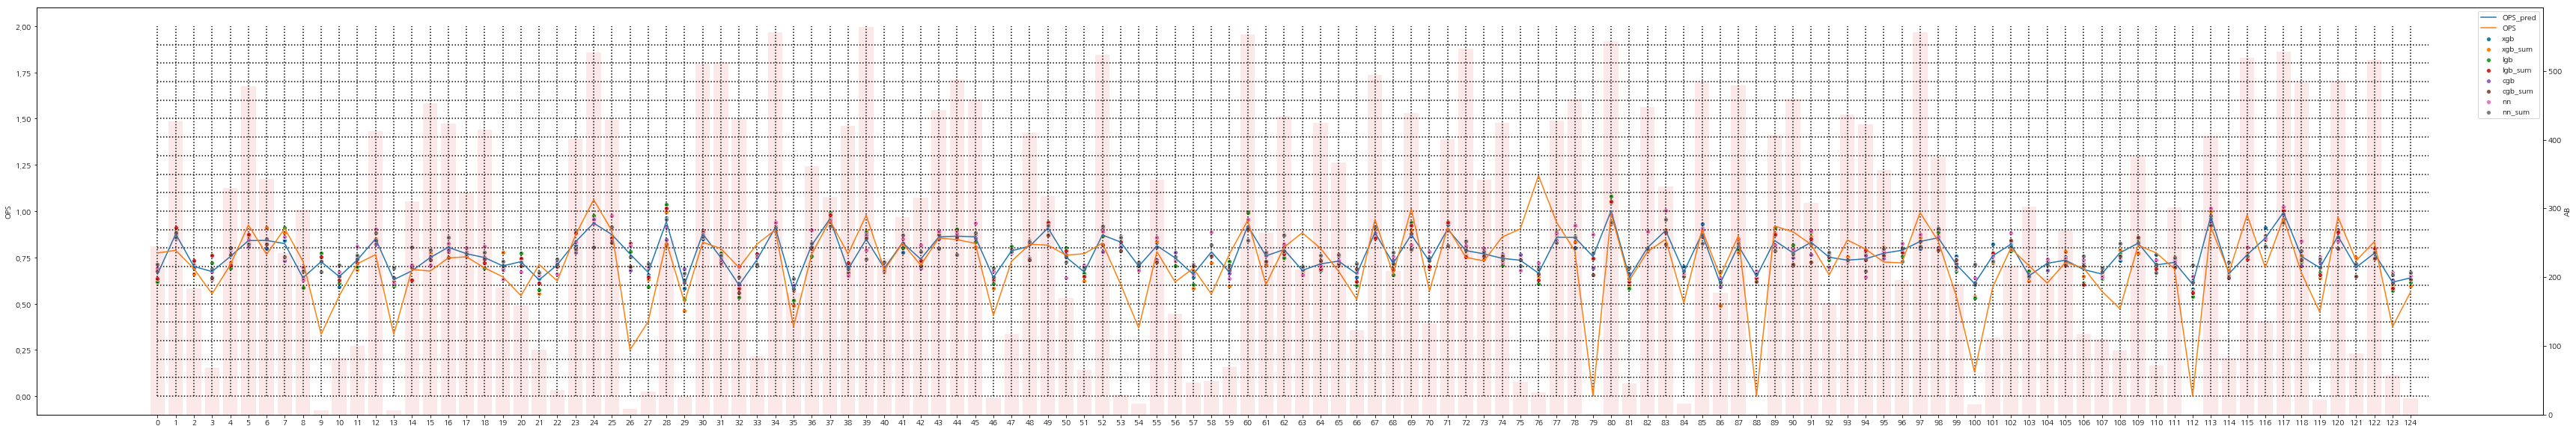

In [493]:
plt.figure(figsize=(60,10))
ax = sns.scatterplot(x=np.arange(prob_xgb.shape[0]), y=prob_xgb, label='xgb')
ax = sns.scatterplot(x=np.arange(prob_sum_xgb.shape[0]), y=prob_sum_xgb, label='xgb_sum')
ax = sns.scatterplot(x=np.arange(prob_lgb.shape[0]), y=prob_lgb, label='lgb')
ax = sns.scatterplot(x=np.arange(prob_sum_lgb.shape[0]), y=prob_sum_lgb, label='lgb_sum')
ax = sns.scatterplot(x=np.arange(prob_cgb.shape[0]), y=prob_cgb, label='cgb')
ax = sns.scatterplot(x=np.arange(prob_sum_cgb.shape[0]), y=prob_sum_cgb, label='cgb_sum')
ax = sns.scatterplot(x=np.arange(prob_nn.shape[0]), y=prob_nn[:,0], label='nn')
ax = sns.scatterplot(x=np.arange(prob_sum_nn.shape[0]), y=prob_sum_nn[:,0], label='nn_sum')
ax = sns.lineplot(x=np.arange(y_test.OPS.shape[0]), y=prob_en, label='OPS_pred')
ax = sns.lineplot(x=np.arange(y_test.OPS.shape[0]), y=y_test.OPS, label='OPS')
ax2 = ax.twinx()
# plt.xticks(np.arange(y_test.shape[0]), y_test.batter_name, size=15, rotation=10)
sns.barplot(x=np.arange(y_test.shape[0]), y=y_test.AB, label='AB', color='red', alpha=0.1, ax=ax2)
ax.vlines(x=np.arange(y_test.shape[0]), ymin=0, ymax=2, linestyles='dotted')
ax.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=y_test.shape[0], linestyles='dotted')
plt.show()

In [497]:
e = wrmse(y_test[config.target], prob_en, y_test['AB'])
e2 = rmse(y_test[config.target], prob_en)
print('## OBP + SLG')
print('test WRMSE: {0:.6f}'.format(e))
print('test RMSE: {0:.6f}'.format(e2))

## OBP + SLG
test WRMSE: 0.090554
test RMSE: 0.175390


## stacking

In [365]:
val_probs_df = pd.concat([val_probs_xgb_df, val_probs_lgb_df, val_probs_cgb_df, val_probs_nn_df], axis=1)
probs_stack = pd.DataFrame({'xgb':probs_xgb, 
                           'xgb_sum':probs_xgb_sum, 
                           'lgb':probs_lgb, 
                           'lgb_sum':probs_lgb_sum, 
                           'cgb':probs_cgb, 
                           'cgb_sum':probs_cgb_sum, 
                           'nn':probs_nn, 
                           'nn_sum':probs_nn_sum})
print('val_probs_df.shape: ',val_probs_df.shape)
print('probs_stack.shape: ',probs_stack.shape)

val_probs_df.shape:  (792, 8)
probs_stack.shape:  (220, 8)


In [253]:
# model
input_shape = (val_probs_df.shape[1],)
nn_stack = NN_temp()
nn_stack.build(input_shape)
probs_nn_stack, val_probs_nn_stack = nn_stack.kfold(data=[val_probs_df, y_data_kfold], 
                                                      test=probs_stack, 
                                                      target=config.target, 
                                                      epochs=500, 
                                                      batch_size=64, 
                                                      early_stopping=30, 
                                                      k=5, 
                                                      seed=config.seed)

------------------------------
0 fold
input_shape:  (8,)
x_valid.shape:  (159, 8)
Train on 633 samples, validate on 159 samples
Epoch 1/500
633/633 [==============================] - 1s 2ms/step - loss: 0.6875 - val_loss: 0.5349
Epoch 2/500
633/633 [==============================] - 0s 101us/step - loss: 0.3597 - val_loss: 0.1460
Epoch 3/500
633/633 [==============================] - 0s 95us/step - loss: 0.1198 - val_loss: 0.1266
Epoch 4/500
633/633 [==============================] - 0s 98us/step - loss: 0.1072 - val_loss: 0.1001
Epoch 5/500
633/633 [==============================] - 0s 101us/step - loss: 0.1019 - val_loss: 0.0937
Epoch 6/500
633/633 [==============================] - 0s 101us/step - loss: 0.0979 - val_loss: 0.0933
Epoch 7/500
633/633 [==============================] - 0s 98us/step - loss: 0.0971 - val_loss: 0.0935
Epoch 8/500
633/633 [==============================] - 0s 101us/step - loss: 0.0979 - val_loss: 0.0927
Epoch 9/500
633/633 [==============================] 

In [476]:
# params = {
#     "learning_rate": 0.1,
#     "n_estimators": 10000,
#     "max_depth": 4,
#     "min_child_weight": 6,
#     "subsample": 0.8,
#     "colsample_bytree": 0.8,
#     "colsample_bylevel": 0.8,
#     "alpha": 0,
#     "lambda": 1,
#     "objective": "gpu:reg:linear",
#     "tree_method": "gpu_hist",
#     "predictor": "gpu_predictor",
#     "eval_metric":"rmse"
# }

params = {
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "max_depth": 3,
    "min_child_weight": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "colsample_bylevel": 0.8,
    "alpha": 0,
    "lambda": 1,
    "objective": "gpu:reg:linear",
    "tree_method": "gpu_hist",
    "predictor": "gpu_predictor",
    "eval_metric":"rmse"
}

In [477]:
xgboost_stack = XGB_temp(params)
probs_xgb_stack, val_probs_xgb_stack = xgboost_stack.kfold(params, [val_probs_df, y_data_kfold], probs_stack, config.target, k=5, seed=config.seed)

------------------------------
0 fold
[0]	validation_0-rmse:0.268101	validation_1-rmse:0.266869
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.11311	validation_1-rmse:0.116231
[100]	validation_0-rmse:0.104878	validation_1-rmse:0.118305
Stopping. Best iteration:
[39]	validation_0-rmse:0.116059	validation_1-rmse:0.115336

------------------------------
1 fold
[0]	validation_0-rmse:0.266386	validation_1-rmse:0.274294
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[50]	validation_0-rmse:0.100814	validation_1-rmse:0.160921
[100]	validation_0-rmse:0.090866	validation_1-rmse:0.162999
Stopping. Best iteration:
[22]	validation_0-rmse:0.107388	validation_1-rmse:0.158996

------------------------------
2 fold
[0]	validation_0-rmse:0.268107	validation

In [369]:
params = {
    'learning_rate': 0.03,
    'n_estimators': 10000,
    'max_depth': 3,
    'num_leaves': 8,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'min_split_gain': np.power(10.0, -10),
    'reg_alpha': 0,
    'reg_lambda': 0,
    'min_child_weight': 10,
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'objective': 'regression',
}

In [370]:
lgb_stack = LGB_temp(params)
probs_lgb_stack, val_probs_lgb_stack = lgb_stack.kfold(params, [val_probs_df, y_data_kfold], probs_stack, config.target, k=5, seed=config.seed)

------------------------------
0 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0733588	valid_1's rmse: 0.115736
Early stopping, best iteration is:
[168]	training's rmse: 0.0746085	valid_1's rmse: 0.115591
------------------------------
1 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0709498	valid_1's rmse: 0.161722
Early stopping, best iteration is:
[194]	training's rmse: 0.0710739	valid_1's rmse: 0.161611
------------------------------
2 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0731142	valid_1's rmse: 0.112986
Early stopping, best iteration is:
[243]	training's rmse: 0.0719643	valid_1's rmse: 0.112638
------------------------------
3 fold
Training until validation scores don't improve for 100 rounds.
[200]	training's rmse: 0.0725584	valid_1's rmse: 0.133394
Early stopping, best iteration is:
[199]	training's rmse: 0.0726184	valid_1's rmse: 0

# submits

In [10]:
temp2019_1 = pd.read_csv('../dataset/basic_record_20191.csv')
temp2019_2 = pd.read_csv('../dataset/basic_record_20192.csv')
print('temp2019_1.shape: ',temp2019_1.shape)
print('temp2019_2.shape: ',temp2019_2.shape)

temp2019_1.shape:  (162, 17)
temp2019_2.shape:  (162, 16)


In [11]:
temp2019 = pd.merge(temp2019_1, temp2019_2, on='선수명', how='inner')
temp2019 = temp2019[['선수명','AB','OPS']]
temp2019.columns = ['batter_name','AB','OPS']
print('temp2019.shape: ',temp2019.shape)

temp2019.shape:  (162, 3)


In [12]:
batter2019 = x_data[x_data.year==2019][['batter_name','year']]
batter2019.head()

batter_name  year
2454         강경학  2019
2455         강구성  2019
2456         강민국  2019
2457         강민호  2019
2458         강백호  2019

In [13]:
batter2019_df = pd.merge(batter2019, temp2019, on='batter_name', how='left')
batter2019_df = batter2019_df.fillna(0)
batter2019_df.OPS = batter2019_df.OPS.replace('-','0')
batter2019_df.OPS = batter2019_df.OPS.astype(float)

In [14]:
print('prob_xgb_submit.shape: ',prob_xgb_submit.shape)
print('prob_xgb_sum_submit.shape: ',prob_xgb_sum_submit.shape)
print('prob_lgb_submit.shape: ',prob_lgb_submit.shape)
print('prob_lgb_sum_submit.shape: ',prob_lgb_sum_submit.shape)
print('prob_cgb_submit.shape: ',prob_cgb_submit.shape)
print('prob_cgb.sum_submit.shape: ',prob_cgb_sum_submit.shape)

NameError: name 'prob_xgb_submit' is not defined

In [499]:
probs = np.array([prob_xgb_submit, prob_xgb_sum_submit, prob_lgb_submit, prob_lgb_sum_submit, prob_cgb_submit, prob_cgb_sum_submit, prob_nn_submit[:,0], prob_nn_sum_submit[:,0]])
prob_en_submit = pd.DataFrame(probs).T.iloc[:,[0,1,2,3,4,5,6,7]].mean(axis=1)
print('prob_en_submit.shape: ',prob_en_submit.shape)

prob_en_submit.shape:  (220,)


**kfold_submit**

In [458]:
probs_kfold = np.array([probs_xgb, probs_xgb_sum, probs_lgb, probs_lgb_sum, probs_cgb, probs_cgb_sum, probs_nn, probs_nn_sum])
# prob_kfold_en_submit = pd.DataFrame(probs_kfold).T.iloc[:,:].mean(axis=1)
prob_kfold_en_submit = (2*pd.DataFrame(probs_kfold).T.iloc[:,:].max(axis=1) + pd.DataFrame(probs_kfold).T.iloc[:,:].min(axis=1))/3
print('prob_kfold_en_submit.shape: ',prob_kfold_en_submit.shape)

prob_kfold_en_submit.shape:  (220,)


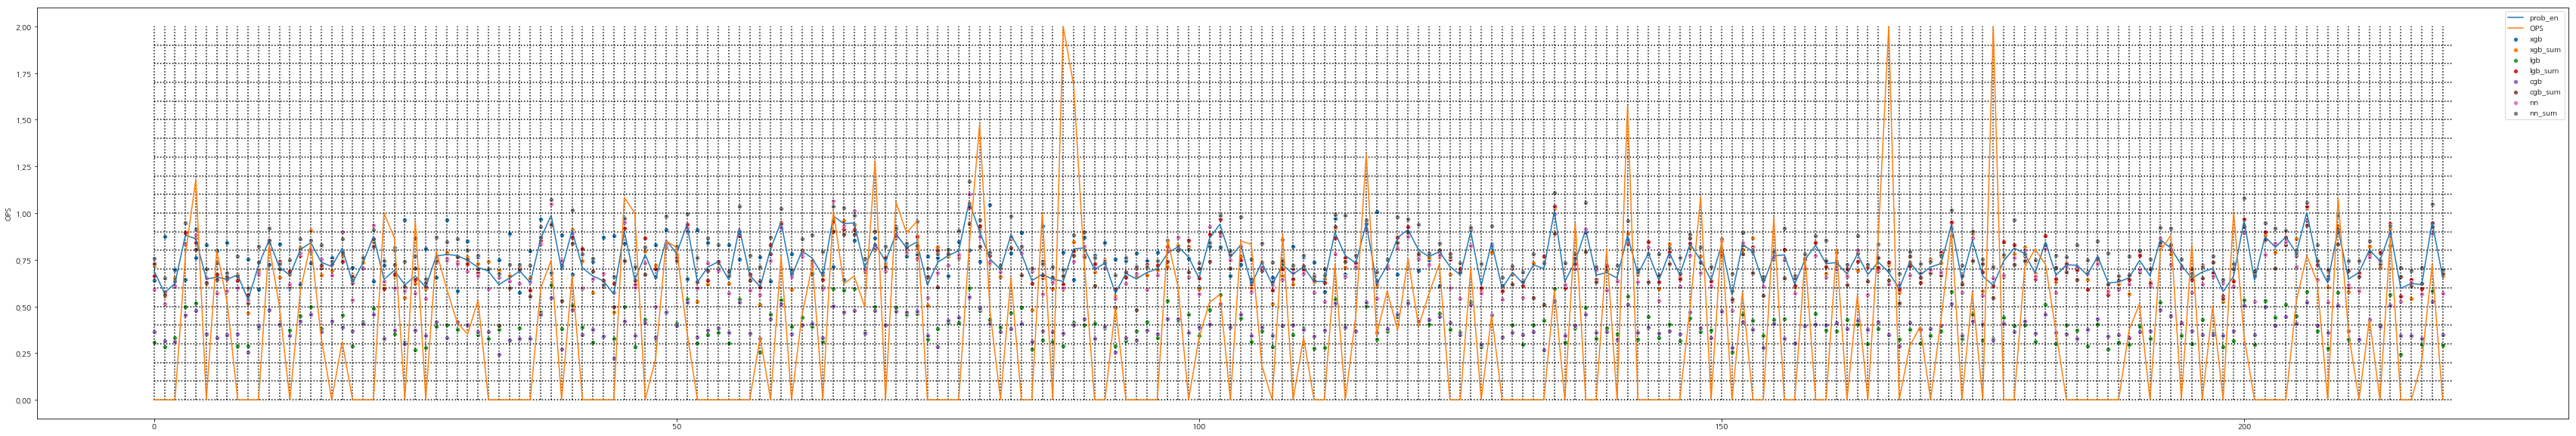

In [459]:
plt.figure(figsize=(60,10))
sns.scatterplot(x=np.arange(prob_xgb.shape[0]), y=prob_xgb, label='xgb')
sns.scatterplot(x=np.arange(prob_xgb_sum_submit.shape[0]), y=prob_xgb_sum_submit, label='xgb_sum')
sns.scatterplot(x=np.arange(prob_lgb_submit.shape[0]), y=prob_lgb_submit, label='lgb')
sns.scatterplot(x=np.arange(prob_lgb_sum_submit.shape[0]), y=prob_lgb_sum_submit, label='lgb_sum')
sns.scatterplot(x=np.arange(prob_cgb_submit.shape[0]), y=prob_cgb_submit, label='cgb')
sns.scatterplot(x=np.arange(prob_cgb_sum_submit.shape[0]), y=prob_cgb_sum_submit, label='cgb_sum')
sns.scatterplot(x=np.arange(prob_nn_submit.shape[0]), y=prob_nn_submit[:,0], label='nn')
sns.scatterplot(x=np.arange(prob_nn_sum_submit.shape[0]), y=prob_nn_sum_submit[:,0], label='nn_sum')
sns.lineplot(x=np.arange(prob_en_submit.shape[0]), y=prob_en_submit, label='prob_en')
# sns.lineplot(x=np.arange(prob_kfold_en_submit.shape[0]), y=prob_kfold_en_submit, label='prob_en_kfold')
sns.lineplot(x=np.arange(batter2019_df.OPS.shape[0]), y=batter2019_df.OPS, label='OPS')
plt.vlines(x=np.arange(batter2019_df.shape[0]), ymin=0, ymax=2, linestyles='dotted')
plt.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=batter2019_df.shape[0], linestyles='dotted')
plt.show()

In [460]:
data_regular = pd.read_csv('../dataset/Regular_Season_Batter.csv')
batter2019_df.loc[:,'OPS_2018'] = list(data_regular[(data_regular.batter_name.isin(batter2019_df.batter_name))&(data_regular.year==2018)].OPS)

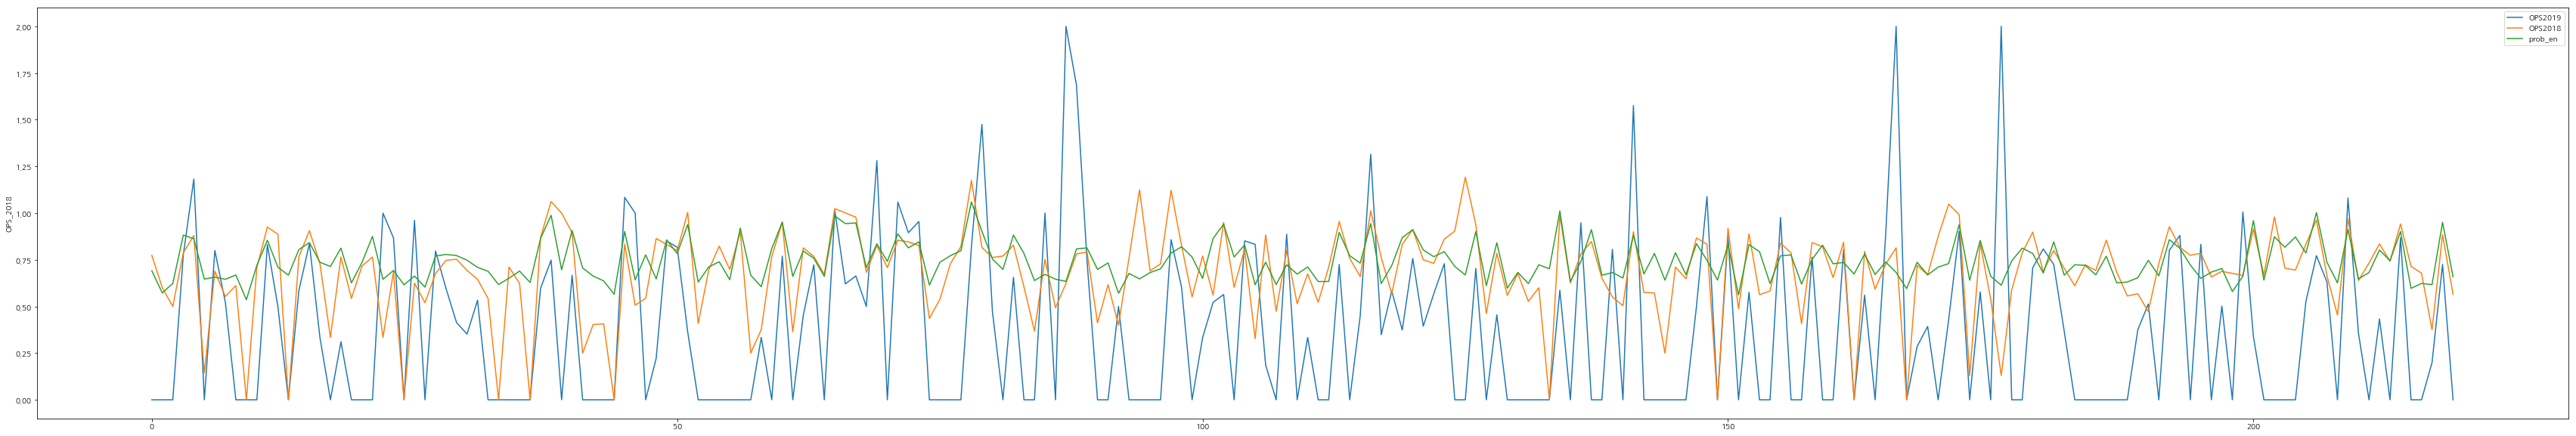

In [461]:
plt.figure(figsize=(60,10))
sns.lineplot(x=np.arange(batter2019_df.shape[0]), y=batter2019_df.OPS, label='OPS2019')
sns.lineplot(x=np.arange(batter2019_df.shape[0]), y=batter2019_df.OPS_2018, label='OPS2018')
sns.lineplot(x=np.arange(prob_en_submit.shape[0]), y=prob_en_submit, label='prob_en')

## Test

In [500]:
e = wrmse(batter2019_df['OPS'], prob_en_submit, batter2019_df['AB'])
print(e)

0.29017216189187395


In [463]:
e = wrmse(batter2019_df['OPS'], prob_kfold_en_submit, batter2019_df['AB'])
print(e)

0.30520123129436183


In [457]:
prob_en_mean = (prob_en_submit / prob_kfold_en_submit) / 2
e = wrmse(batter2019_df['OPS'], prob_en_mean, batter2019_df['AB'])
print(e)

0.47636688808209027


In [478]:
e = wrmse(batter2019_df['OPS'], probs_xgb_stack, batter2019_df['AB'])
print(e)

0.2996526965020405


In [276]:
e = wrmse(batter2019_df['OPS'], probs_nn_stack, batter2019_df['AB'])
print(e)

0.3010170733221983


In [371]:
e = wrmse(batter2019_df['OPS'], probs_lgb_stack, batter2019_df['AB'])
print(e)

0.307447757342438


In [277]:
s = pd.read_csv('../submission/submit6(cat_sum_anb_nn_and_nn_sum).csv', encoding='cp949')
e = wrmse(batter2019_df['OPS'], s.OPS, batter2019_df['AB'])
print(e)

0.29040996867294855


In [278]:
submit = pd.read_csv('../dataset/submission.csv')

In [305]:
submit.loc[:,'OPS'] = prob_kfold_en_submit
# submit.to_csv('../submission/submit6(cat_sum_anb_nn_and_nn_sum).csv',index=False, encoding='cp949')

In [280]:
batter2018_df = data_regular[(data_regular.batter_name.isin(batter2019_df.batter_name.unique()))&(data_regular.year==2018)].sort_values(by='OPS')
data_regular[data_regular.batter_name.isin(batter2018_df[batter2018_df.OPS==0].batter_name.unique())].shape

(43, 29)

# 미래전략공간

In [15]:
temp20190331_1 = pd.read_csv('../dataset/basic_record_201903311.csv')
temp20190331_2 = pd.read_csv('../dataset/basic_record_201903312.csv')
print('temp20190331_1.shape: ',temp20190331_1.shape)
print('temp20190331_2.shape: ',temp20190331_2.shape)

temp20190331_1.shape:  (164, 17)
temp20190331_2.shape:  (164, 16)


In [16]:
temp20190331 = pd.merge(temp20190331_1, temp20190331_2, on='선수명', how='inner')
temp20190331 = temp20190331[['선수명','AB','OPS']]
temp20190331.columns = ['batter_name','AB0331','OPS0331']
print('temp20190331.shape: ',temp20190331.shape)

temp20190331.shape:  (164, 3)


In [18]:
temp20190402_1 = pd.read_csv('../dataset/basic_record_201904021.csv')
temp20190402_2 = pd.read_csv('../dataset/basic_record_201904022.csv')
print('temp20190402_1.shape: ',temp20190402_1.shape)
print('temp20190402_2.shape: ',temp20190402_2.shape)

temp20190402_1.shape:  (166, 17)
temp20190402_2.shape:  (166, 16)


In [19]:
temp20190402 = pd.merge(temp20190402_1, temp20190402_2, on='선수명', how='inner')
temp20190402 = temp20190402[['선수명','AB','OPS']]
temp20190402.columns = ['batter_name','AB0402','OPS0402']
print('temp20190402.shape: ',temp20190402.shape)

temp20190402.shape:  (166, 3)


In [20]:
batter2019 = x_data[x_data.year==2019][['batter_name','year']]
batter2019.head()

batter_name  year
2454         강경학  2019
2455         강구성  2019
2456         강민국  2019
2457         강민호  2019
2458         강백호  2019

In [36]:
batter20190331_df = pd.merge(batter2019, temp20190331, on='batter_name', how='left')
batter20190331_df = batter20190331_df.fillna(0)
batter20190331_df.OPS0331 = batter20190331_df.OPS0331.replace('-','0')
batter20190331_df.OPS0331 = batter20190331_df.OPS0331.astype(float)

batter20190402_df = pd.merge(batter2019, temp20190402, on='batter_name', how='left')
batter20190402_df = batter20190402_df.fillna(0)
batter20190402_df.OPS0402 = batter20190402_df.OPS0402.replace('-','0')
batter20190402_df.OPS0402 = batter20190402_df.OPS0402.astype(float)

In [37]:
df = data[['batter_name','year','total_AB','corrected_OPS','OPS']]
df = df[(df.batter_name.isin(batter2019_df.batter_name.unique())) & (df.year >= 2017)]
df2017 = df[df.year==2017]
df2018 = df[df.year==2018]
df2019 = df[df.year==2019]

df2017.columns = ['batter_name','year','total_AB_2017','c_OPS_2018','OPS_2017']
df2018.columns = ['batter_name','year','total_AB_2018','c_OPS_2019','OPS_2018']
df2019.columns = ['batter_name','year','total_AB_2019','c_OPS_2020','OPS_2019']
df2017 = df2017.drop('year',axis=1)
df2018 = df2018.drop('year',axis=1)
df2019 = df2019.drop('year',axis=1)
df1718 = pd.merge(df2018, df2017, on='batter_name', how='left')
df = pd.merge(df1718, df2019, on='batter_name', how='left')

In [419]:
pred2018 = pd.DataFrame(probs2018).T
pred2018.columns = ['xgb_2018','xgb_sum_2018','lgb_2018','lgb_sum_2018','cgb_2018','cgb_sum_2018','nn_2018','nn_sum_2018']

In [420]:
pred2019 = pd.DataFrame(probs).T
pred2019.columns = ['xgb_2019','xgb_sum_2019','lgb_2019','lgb_sum_2019','cgb_2019','cgb_sum_2019','nn_2019','nn_sum_2019']

In [421]:
pred2019_kfold = pd.DataFrame(probs_kfold).T
pred2019_kfold.columns = ['xgb_k_2019','xgb_sum_k_2019','lgb_k_2019','lgb_sum_k_2019','cgb_k_2019','cgb_sum_k_2019','nn_k_2019','nn_sum_k_2019']

In [422]:
print('df.shape: ',df.shape)
print('pred2019.shape: ',pred2019.shape)
# print('pred2019_kfold.shape: ',pred2019_kfold.shape)

df.shape:  (220, 10)
pred2019.shape:  (220, 8)


In [51]:
# predictions = pd.concat([df, pred2019, pred2019_kfold, batter2019_df.OPS, batter20190331_df.OPS0331], axis=1)
predictions = pd.concat([df, batter2019_df.OPS, batter20190331_df.OPS0331, batter20190402_df.OPS0402], axis=1)

누적시즌과 AB 비율계산

In [52]:
cum_season = data[data.year<2019].batter_name.value_counts().reset_index()
cum_season.columns = ['batter_name','cum_season_2018']
predictions = pd.merge(predictions, cum_season, on='batter_name', how='left')
predictions.loc[:,'AB_rate_2019'] = predictions.total_AB_2019 / predictions.cum_season_2018

In [53]:
# s.columns = ['batter_id', 'batter_name', 'OPS_0330_1rank']

NameError: name 's' is not defined

In [54]:
predictions = pd.concat([predictions,batter2019_df.AB], axis=1)
predictions = pd.concat([predictions,batter20190331_df.AB0331], axis=1)
# predictions = pd.concat([predictions, s.OPS_0330_1rank], axis=1)
# predictions.loc[:,'OPS2019_xgb_stack'] = probs_xgb_stack
# predictions.loc[:,'OPS2019_nn_stack'] = probs_nn_stack
# predictions.loc[:,'OPS2019_lgb_stack'] = probs_lgb_stack

In [55]:
season_out = ['강상원','이용규','박헌도','이대수','정성훈','이영욱','백상원','최원제','임훈','박기혁','이진영','최준석','이종욱','김태완','윤병호','조동찬','정경운']
second = ['강한울','권정웅','김민성','김사훈','김응민','김인태','김재현','김재율','김종덕','김주형','김지수','김진곤','김철호','김형준','김회성','남태혁','박공원','박지규','백민기','서동욱','신범수','신성현','양석환','유민상','윤정우','이동훈','이범호','이병휘','이성곤','이우성','이인행','이재율','이준수','이흥련','전민재','조수행','최정민','황진수','홍창기']
predictions.loc[predictions.batter_name.isin(season_out),'season_out'] = 1
predictions.season_out = predictions.season_out.fillna(0)
predictions.loc[predictions.batter_name.isin(second),'second'] = 1
predictions.second = predictions.second.fillna(0)

In [428]:
# predictions.to_csv('../dataset/stragy2019.csv', index=False, encoding='cp949')

In [429]:
e = wrmse(predictions.OPS0331, prob_en_submit, predictions.AB0331)
print(e)

0.293889577140176


In [464]:
e = wrmse(predictions.OPS0331, prob_kfold_en_submit, predictions.AB0331)
print(e)

0.28908001558873386


In [431]:
prob_en_mean = (prob_en_submit / prob_kfold_en_submit) / 2
e = wrmse(predictions.OPS0331, prob_en_mean, predictions.AB0331)
print(e)

0.35501726114405313


In [479]:
e = wrmse(predictions.OPS0331, probs_xgb_stack, predictions.AB0331)
print(e)

0.28426359682309216


In [433]:
e = wrmse(predictions.OPS0331, probs_nn_stack, predictions.AB0331)
print(e)

0.28531106954321184


In [434]:
e = wrmse(predictions.OPS0331, probs_lgb_stack, predictions.AB0331)
print(e)

0.2917407658662569


In [435]:
s = pd.read_csv('../submission/submit6(cat_sum_anb_nn_and_nn_sum).csv', encoding='cp949')
e = wrmse(predictions.OPS0331, s.OPS, predictions.AB0331)
print(e)

0.27688278524752963


In [56]:
predictions.columns

Index(['batter_name', 'total_AB_2018', 'c_OPS_2019', 'OPS_2018',
       'total_AB_2017', 'c_OPS_2018', 'OPS_2017', 'total_AB_2019',
       'c_OPS_2020', 'OPS_2019', 'OPS', 'OPS0331', 'OPS0402',
       'cum_season_2018', 'AB_rate_2019', 'AB', 'AB0331', 'season_out',
       'second'],
      dtype='object')

In [57]:
predictions1 = predictions.iloc[:44,:]
predictions2 = predictions.iloc[44:88, :]
predictions3 = predictions.iloc[88:132, :]
predictions4 = predictions.iloc[132:176,:]
predictions5 = predictions.iloc[176:,:]
predictions_list = [predictions1, predictions2, predictions3, predictions4, predictions5]

54 39

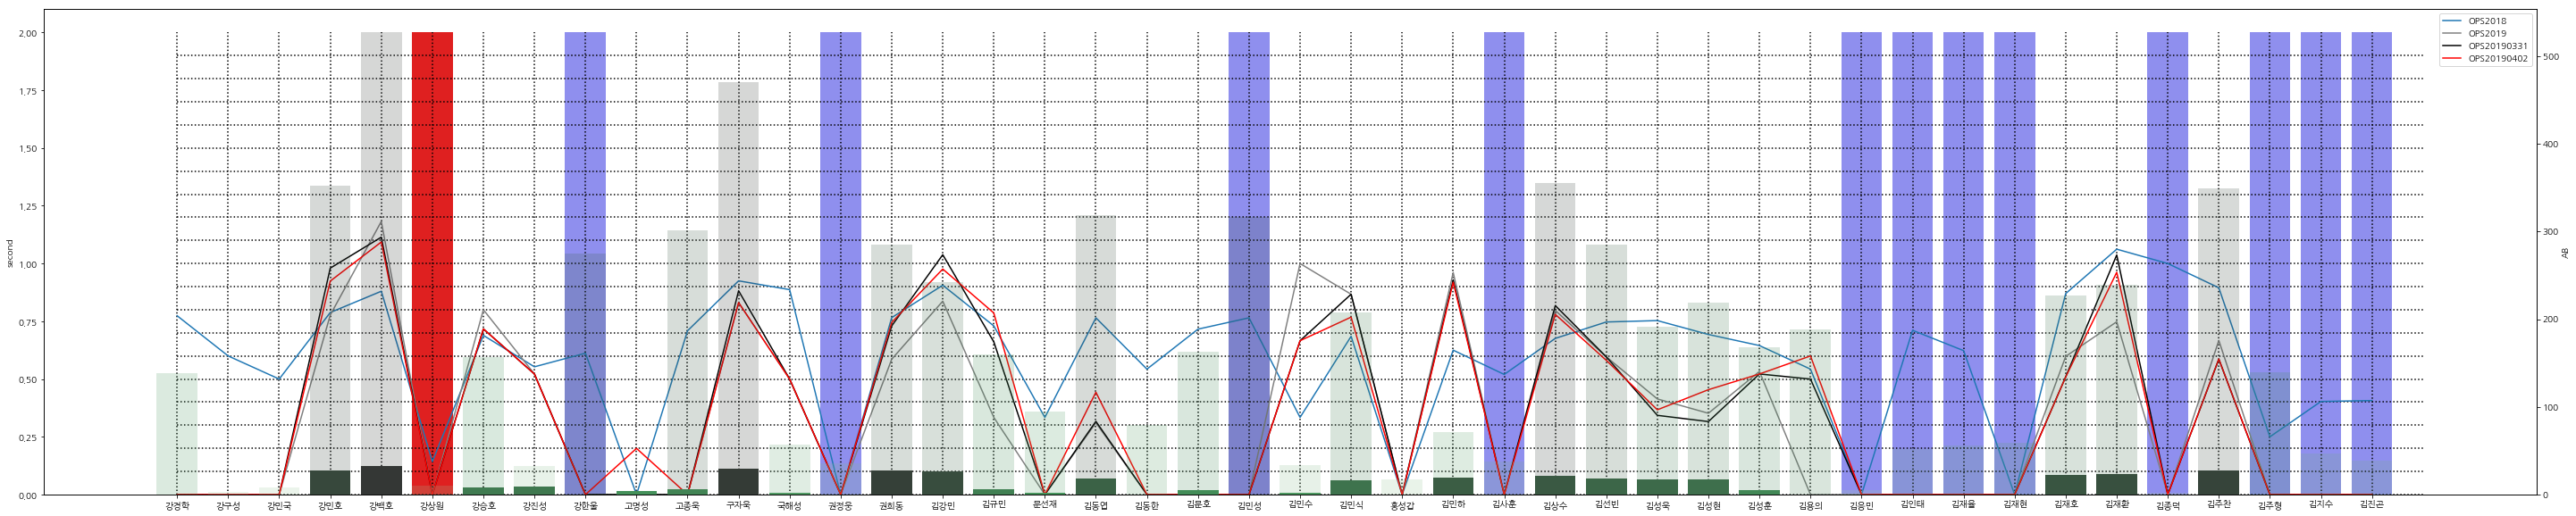

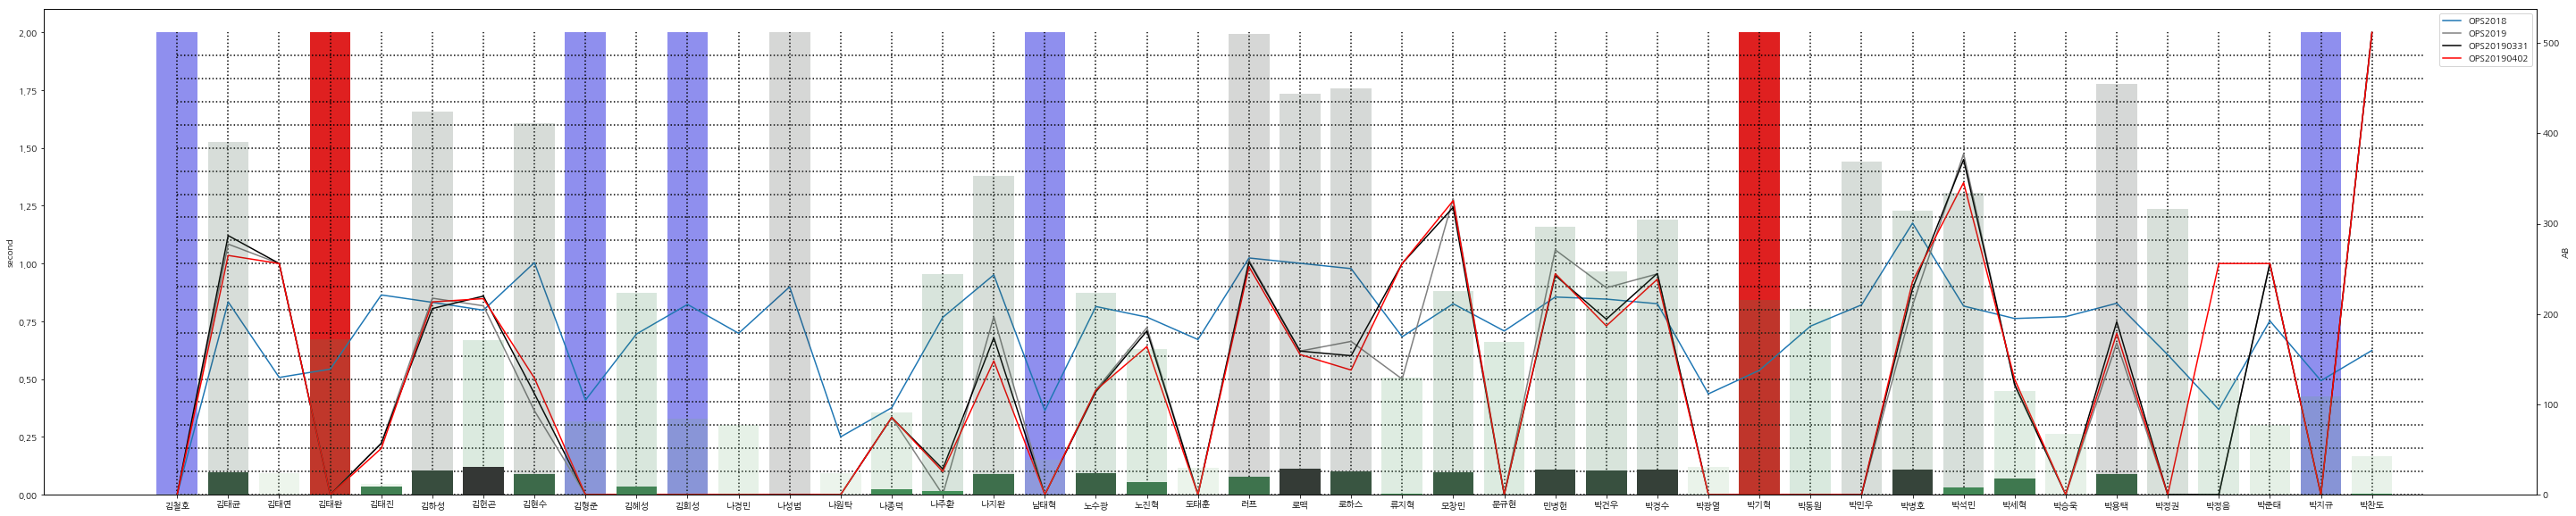

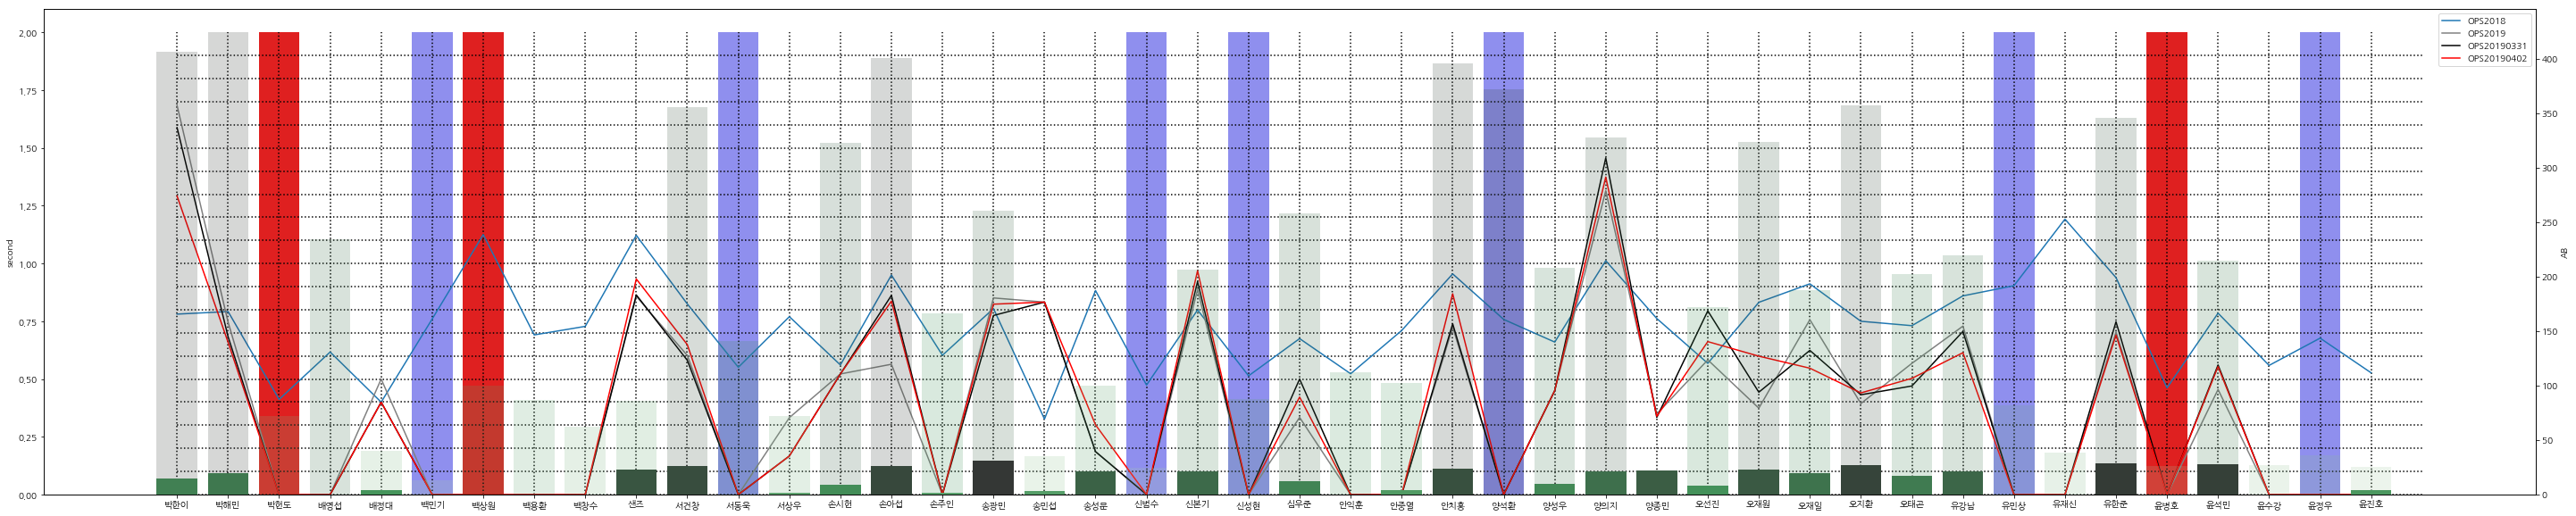

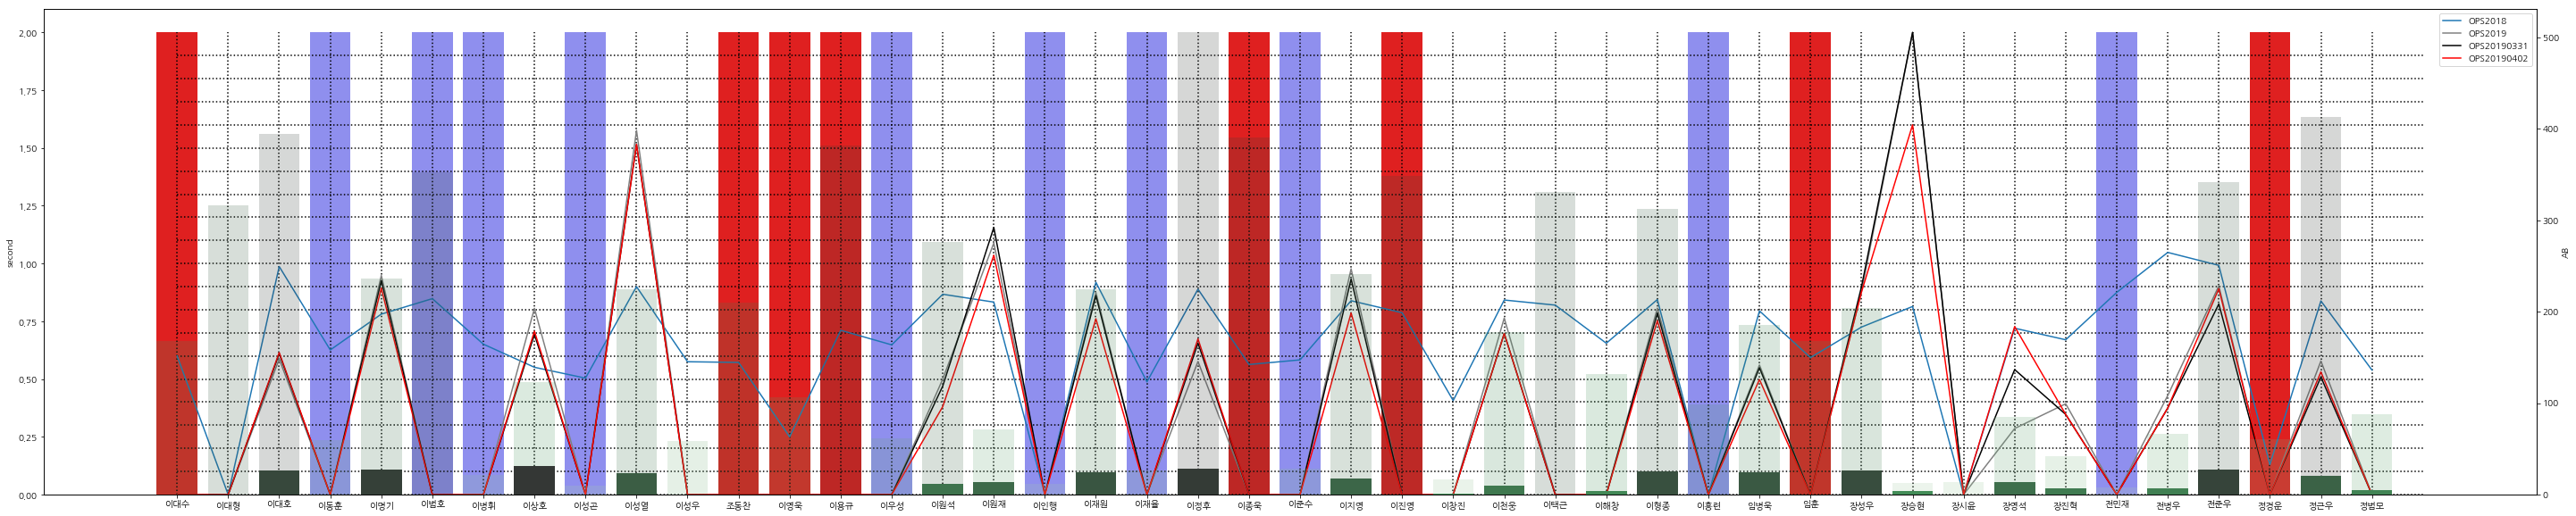

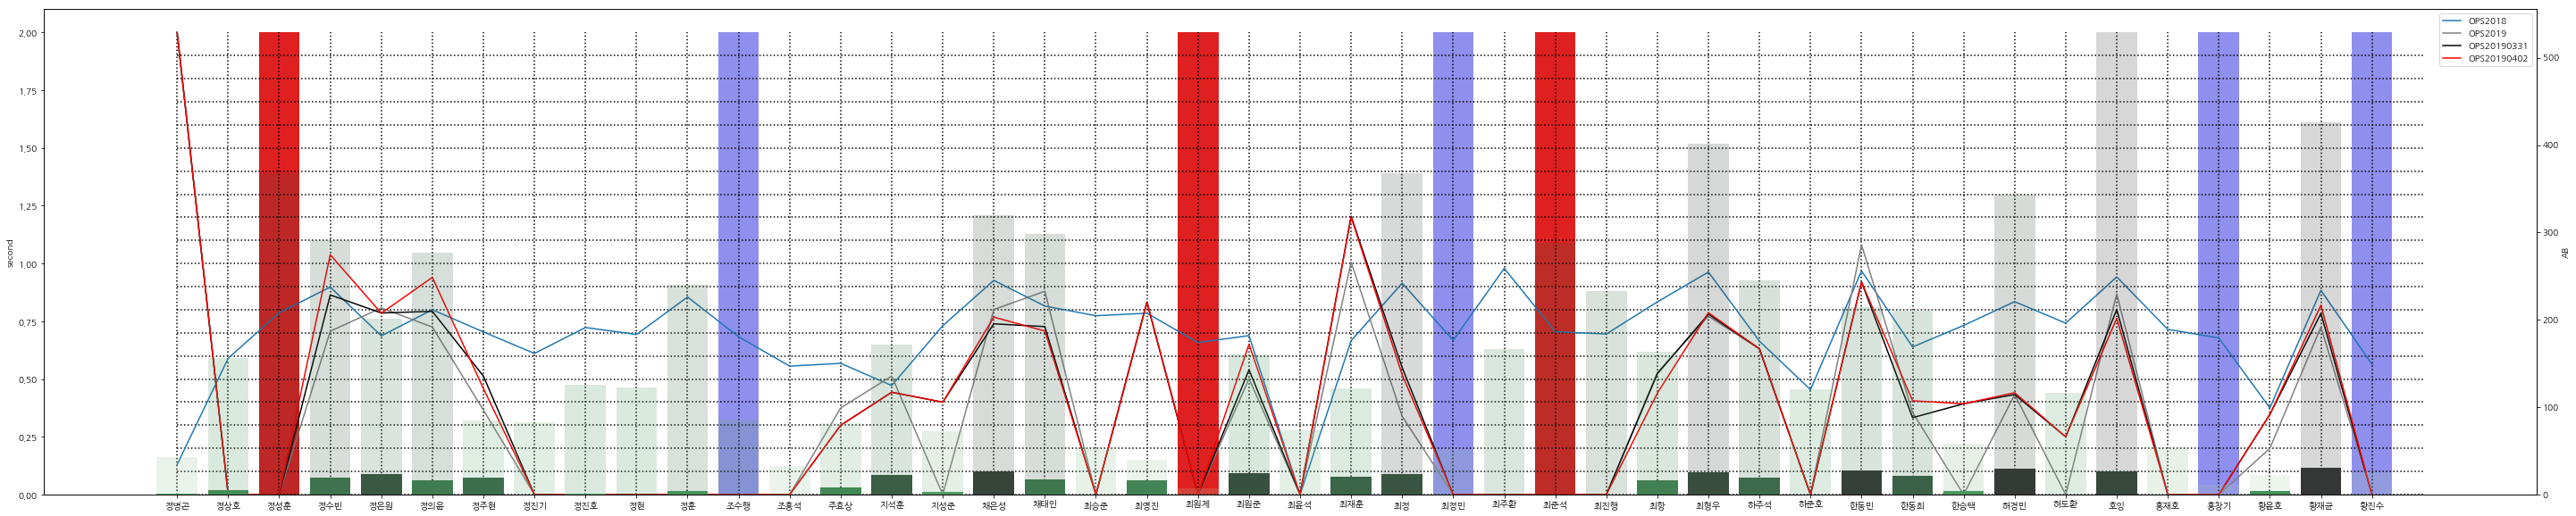

In [61]:
for pred in predictions_list:
    plt.figure(figsize=(50,10))
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.xgb_2019, label='xgb_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.xgb_sum_2019, label='xgb_sum_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.xgb_k_2019, label='xgb_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.xgb_sum_k_2019, label='xgb_sum_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.lgb_2019, label='lgb_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.lgb_sum_2019, label='lgb_sum_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.lgb_k_2019, label='lgb_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.lgb_sum_k_2019, label='lgb_sum_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.cgb_2019, label='cgb_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.cgb_sum_2019, label='cgb_sum_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.cgb_k_2019, label='cgb_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.cgb_sum_k_2019, label='cgb_sum_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.nn_2019, label='nn_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.nn_sum_2019, label='nn_sum_2019')
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.nn_k_2019, label='nn_k_2019', marker='x', s=100)
#     ax = sns.scatterplot(x=np.arange(pred.shape[0]), y=pred.nn_sum_k_2019, label='nn_sum_k_2019', marker='x', s=100)
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS_2018, label='OPS2018')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.c_OPS_2019, label='c_OPS2019')
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS, label='OPS2019', color='gray')
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS0331, label='OPS20190331', color='black')
    ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS0402, label='OPS20190402', color='red')
    ax = sns.barplot(x=np.arange(pred.shape[0]), y=pred.season_out*2, label='season_out', color='red')
    ax = sns.barplot(x=np.arange(pred.shape[0]), y=pred.second*2, label='second', color='blue', alpha=0.5)
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred[['xgb_k_2019', 'xgb_sum_k_2019', 'lgb_k_2019', 'lgb_sum_k_2019', 'cgb_k_2019', 'cgb_sum_k_2019', 'nn_k_2019', 'nn_sum_k_2019']].mean(axis=1), label='OPS2019_k_mean')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred[['xgb_sum_2019', 'lgb_sum_2019', 'cgb_sum_2019', 'nn_2019', 'nn_sum_2019']].mean(axis=1), label='OPS2019_mean')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred[['xgb_2019','xgb_sum_2019', 'lgb_2019', 'lgb_sum_2019', 'cgb_2019', 'cgb_sum_2019', 'nn_2019', 'nn_sum_2019']].mean(axis=1), label='OPS2019_mean')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS_0330_1rank, label='OPS_0330_1rank')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS2019_xgb_stack, label='OPS2019_xgb_stack')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS2019_lgb_stack, label='OPS2019_lgb_stack')
#     ax = sns.lineplot(x=np.arange(pred.shape[0]), y=pred.OPS2019_nn_stack, label='OPS2019_nn_stack')
#     ax.lines[-6].set_linestyle("--")
#     ax.lines[-5].set_linestyle("--")
#     ax.lines[-4].set_linestyle("--")
#     ax.lines[-3].set_linestyle("--")
#     ax.lines[-2].set_linestyle("--")
#     ax.lines[-1].set_linestyle("--")
    ax2 = ax.twinx()
    pal = sns.color_palette("Greens_d", pred.shape[0])
    rank = pred.AB_rate_2019.argsort().argsort()
    rank2 = pred.AB.argsort().argsort()
    sns.barplot(x=np.arange(pred.shape[0]), y=pred.AB_rate_2019, palette=np.array(pal[::-1])[rank], alpha=0.2, ax=ax2)
    sns.barplot(x=np.arange(pred.shape[0]), y=pred.AB, palette=np.array(pal[::-1])[rank2], ax=ax2)
    plt.xticks(np.arange(pred.shape[0]), pred.batter_name, size=15, rotation=10)
    ax.vlines(x=np.arange(pred.shape[0]), ymin=0, ymax=2, linestyles='dotted')
    ax.hlines(y=np.arange(0,2,0.1), xmin=0, xmax=pred.shape[0], linestyles='dotted')
#     ax.set_ylim([0.25,1.25])
    plt.show()

In [529]:
submit = pd.read_csv('../dataset/submission.csv')
submit.loc[:,'OPS'] = prob_kfold_en_submit
# submit.loc[:,'OPS'] = probs_xgb_stack
submit.to_csv('../submission/submit7(model4_and_pred8_kfold).csv', index=False)

In [523]:
# submit.sort_values(by='OPS', ascending=False).to_csv('../moon.csv',index=False)

In [524]:
submit.loc[:,'OPS_stacking'] = probs_xgb_stack
# submit.loc[:,'OPS_en'] = prob_en_submit
submit.loc[:,'OPS_nn_stacking'] = probs_nn_stack
submit.loc[:,'diff'] = submit.OPS - submit.OPS_stacking

In [525]:
pd.set_option('display.max_rows', 500)

In [526]:
submit.sort_values(by='OPS_nn_stacking',ascending=False)

batter_id batter_name       OPS  OPS_stacking  OPS_nn_stacking      diff
78         113         박병호  1.029276      0.993223         1.015940  0.036053
38          58         김재환  1.008186      0.974564         1.007489  0.033622
134        202         이대호  0.979188      0.956343         0.989989  0.022845
67          95         로하스  0.994387      0.934885         0.983827  0.059502
65          90          러프  0.972257      0.960064         0.964333  0.012194
66          91          로맥  0.965523      0.924772         0.958274  0.040751
206        319         최형우  0.962572      0.934571         0.953669  0.028001
209        326         한동민  0.945139      0.925011         0.938553  0.020128
102        149         손아섭  0.945573      0.922133         0.934100  0.023440
214        334          호잉  0.940053      0.935064         0.932281  0.004989
60          84         나지완  0.931627      0.886217         0.924528  0.045410
56          79         나성범  0.924928      0.893679         0.920378  0.031249
218        342         황재균  0.941542      0.878887         0.919688  0.062656
200        313          최정  0.927423      0.926277         0.918889  0.001145
51          73         김현수  0.919083      0.927311         0.912040 -0.008228
172        261         전준우  0.925164      0.928730         0.910538 -0.003566
120        180         오재일  0.914144      0.878324         0.907789  0.035820
116        174         양의지  0.903243      0.872640         0.902347  0.030603
141        211         이성열  0.901311      0.853864         0.886406  0.047447
126        192         유한준  0.885207      0.840566         0.886167  0.044641
202        315         최주환  0.889695      0.861816         0.873517  0.027879
113        169         안치홍  0.873441      0.836658         0.865382  0.036783
71         103         민병헌  0.862966      0.840401         0.858145  0.022566
4            5         강백호  0.865485      0.843219         0.857671  0.022266
11          19         구자욱  0.852237      0.831996         0.848517  0.020241
204        317         최진행  0.857933      0.821159         0.838360  0.036773
79         115         박석민  0.843656      0.829824         0.837310  0.013832
37          57         김재호  0.853787      0.821397         0.837274  0.032390
192        300         채은성  0.838039      0.826945         0.834565  0.011093
40          62         김주찬  0.837668      0.827424         0.829049  0.010244
152        227         이정후  0.837867      0.811581         0.827835  0.026287
147        220         이원석  0.836052      0.812764         0.826940  0.023288
49          71         김하성  0.830468      0.810784         0.823706  0.019683
72         104         박건우  0.827120      0.811365         0.823476  0.015755
137        207         이범호  0.856166      0.837154         0.822759  0.019012
150        224         이재원  0.831707      0.815314         0.822628  0.016393
3            4         강민호  0.837359      0.815249         0.821613  0.022110
181        274         정의윤  0.823423      0.807857         0.819176  0.015566
119        179         오재원  0.850980      0.808288         0.818540  0.042693
45          67         김태균  0.852206      0.885832         0.818140 -0.033626
73         105         박경수  0.836469      0.814128         0.816174  0.022342
15          24         김강민  0.818306      0.823403         0.814666 -0.005097
21          36         김민성  0.828691      0.806723         0.813213  0.021968
101        148         손시헌  0.836512      0.828889         0.811846  0.007624
82         119         박용택  0.827696      0.841816         0.810548 -0.014120
69          99         모창민  0.820233      0.804309         0.807444  0.015923
174        264         정근우  0.813123      0.818618         0.805966 -0.005495
159        238         이택근  0.815066      0.812020         0.800497  0.003046
128        194         윤석민  0.808349      0.797954         0.799046  0.010395
193        301         채태인  0.804582      0.799924         0.798508  0.004658
98         144         서건창 

In [447]:
pd.read_csv('../submission/submit6(cat_sum_anb_nn_and_nn_sum).csv',encoding='cp949').head()

batter_id batter_name       OPS
0          1         강경학  0.580656
1          2         강구성  0.530863
2          3         강민국  0.561342
3          4         강민호  0.747937
4          5         강백호  0.801112

In [440]:
submit[submit.batter_name=='샌즈']

batter_id batter_name       OPS
97        143          샌즈  0.795423

In [200]:
data[data.batter_name=='김민수'][['batter_name','year','team','position','avg']]

batter_name  year team  position    avg
318          김민수  2014   한화  포수(우투우타)  0.149
319          김민수  2017   삼성  포수(우투우타)  0.143
320          김민수  2018   삼성  포수(우투우타)  0.167
2476         김민수  2019   KT  포수(우투우타)    NaN